# Part I - (Exploring the ProsperLoanData Dataset)
## by (Olatunji Jola)

<a id = 'intro'></a>
## Introduction
> The ProsperLoanData Dataset was put together by Prosper Funding LLC, The first peer to peer online loan company. The dataset contains 113937 observations and 81 variables about different loan listing from 2005 to 2014.
The listing can be broadly divided into three observational units, a concise summary of the loan listing, a detailed profile of the borrower and historical data of previous loan by the same borrower and information about the current loan.
a more detailed description of the dataset variables is available in the dataset variable defination [here](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554484977407000).


## Table of Content
<ul>
<li><a href='#intro'> Introduction</a></li>
<li><a href='#prem_wrangling'> Preliminary Wrangling</a></li>
<li><a href='#Univariate'> Univariate Exploration </a></li>  
<li><a href='#Bivariate'> Bivariate Exploration </a></li>
<li><a href='#Multivariate'> Multivariate Exploration </a></li>
<li><a href='#Conclusion'> Conclusion </a></li>
</ul>


<a id='prem_wrangling'></a>
## Preliminary Wrangling
This section is divided into three segmets according to the identified observational unit
<ul>
<li><a href = '#prem_list'>listing</a></li>
<li><a href = '#prem_borr'>borrower_profile</a></li>
<li><a href = '#prem_loan'>loan</a></li>
<li><a href = '#prem_dis'>Dataset Structure</a></li>
</ul>
<li><a href='#intro'> Home</a></li>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline

In [2]:
# suppress warnings from final output
warnings.filterwarnings('ignore')

In [3]:
# loading in the dataset
prosper = pd.read_csv('prosperLoanData.csv')

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
print(prosper.shape)
prosper.info()

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

#### Split into three observational units
A quick observation of the dataset reveals that there are three observational units

- Listing details
- Borrower's profile
- Loan data

I will separate these data into these observational units while using the Listingkey as the primary key

In [5]:
# Splitting the data set into three observational unit with ListingKey as primary key
listing = prosper.iloc[:,0:17].copy()
borrowers_profile = prosper.iloc[:,np.r_[0, 17:50, 66]].copy()
loan = prosper.iloc[:, np.r_[0, 50:80]].drop('MemberKey', axis = 1).copy()

In [6]:
print(listing.shape)
print(listing.info())

(113937, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 113937 non-null  object 
 1   ListingNumber              113937 non-null  int64  
 2   ListingCreationDate        113937 non-null  object 
 3   CreditGrade                28953 non-null   object 
 4   Term                       113937 non-null  int64  
 5   LoanStatus                 113937 non-null  object 
 6   ClosedDate                 55089 non-null   object 
 7   BorrowerAPR                113912 non-null  float64
 8   BorrowerRate               113937 non-null  float64
 9   LenderYield                113937 non-null  float64
 10  EstimatedEffectiveYield    84853 non-null   float64
 11  EstimatedLoss              84853 non-null   float64
 12  EstimatedReturn            84853 non-null   float64
 13  ProsperRating (n

<a id = 'prem_list'></a>
### listing

I will focus on cleaning the listing DataFrame in this section.

In [7]:
listing.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric)
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2


In [8]:
# Summary statistics of numerical variables
listing.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric)
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,1.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,1.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,3.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,20.000000


#### Observation
 - ListingCreationDate and ClosedDate column should be a datetime object
 - ProsperRating (numeric) not neccessary
 - ProsperRating (alpha) should be an ordered categorical variable from best to worst 
 - ProsperScore, CreditGrade and LoanStatus are supposed to be categorical variables
 - ListingCategory variable should be more descriptive and should be a categorical variable

#### DateTime object
- ListingCreationDate and ClosedDate column should be a datetime object

    Convert ListingCreationDate and ClosedDate to Date time object

#### Code

In [9]:
listing['ListingCreationDate'] = pd.to_datetime(listing['ListingCreationDate'])
listing['ClosedDate'] = pd.to_datetime(listing['ClosedDate'])

#### Test

In [10]:
listing[['ListingCreationDate','ClosedDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 2 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   ListingCreationDate  113937 non-null  datetime64[ns]
 1   ClosedDate           55089 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.7 MB


 #### ProsperRating (numeric)
    - ProsperRating (numeric) not neccessary

#### Code

In [11]:
listing.drop('ProsperRating (numeric)', axis = 1, inplace = True)

#### Test

In [12]:
listing.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (Alpha)', 'ProsperScore',
       'ListingCategory (numeric)'],
      dtype='object')

#### Ordered Categorical variable
    
`Term`, ``ProsperRating``, `CreditGrade`, `ProsperScore`, `LoanStatus` are converted to ordered  categorical variables

In [13]:
def ordered_class(list_,dataframe,col, order):
    
    
    '''
    creates an ordered class of a categorical variable
    
    Args:
    list_ (list): Ordered list of the class
    dataframe (DataFrame): The DataFrame on which the categorical variable exist
    col (string): the c column of interest
    order (boolean) a True or False value indicating whether the category should be ordered or not.
    
    
    returns:
    dataframe[col]:The column that is now converted to categorical variable 
    
    '''
    # creating an ordered category of c class
    class_ = pd.api.types.CategoricalDtype(ordered = order, categories = list_)
    
    #apply to c_col
    dataframe[col] = dataframe[col].astype(class_)
    return (dataframe[col])

In [14]:
# rename the column ProsperRating (Alpha)
listing.rename(columns = {'ProsperRating (Alpha)': 'ProsperRating'}, inplace = True)

In [15]:
# Converting prosperscore to integer
listing['ProsperScore'].apply(lambda x: x if np.isnan(x) else int(x))

# creating an ordered list of ProsperRating, CreditGrade, ProsperScore, and LoanStatus level

Term = [12,36,60]
ProsperRating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
CreditGrade = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ProsperScore= [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0]
LoanStatus = ['Completed', 'FinalPaymentInProgress', 'Current',
              'Cancelled', 'Past Due (1-15 days)', 'Past Due (16-30 days)',
              'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)',
              'Past Due (>120 days)', 'Defaulted', 'Chargedoff']

In [16]:
categorical_column = [Term, ProsperRating, CreditGrade, ProsperScore, LoanStatus]
column_name = ['Term', 'ProsperRating','CreditGrade','ProsperScore','LoanStatus']

a = 0

for value in categorical_column:
    
    listing[column_name[a]] = ordered_class(value, listing, column_name[a], True)
    a+=1


#### Test

In [17]:
listing[column_name].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   Term           113937 non-null  category
 1   ProsperRating  84853 non-null   category
 2   CreditGrade    28953 non-null   category
 3   ProsperScore   84853 non-null   category
 4   LoanStatus     113937 non-null  category
dtypes: category(5)
memory usage: 558.1 KB


#### ListingCategory
- rename the ``ListingCategory (numeric)`` column as ``ListingCategory``
- ListingCategory variable should be more descriptive
    each of the numerical values have a particular meaning
     
>0 - NaN, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - WeddingLoans

- convert the type of the column to a categorical variable

#### Code

In [18]:
# rename 'ListingCategory (numeric)' with 'ListingCategory'
listing.rename(columns = {'ListingCategory (numeric)': 'ListingCategory'}, inplace = True)

# Creating a list of category_number and category_value
category_number = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


category_value = ['Not Available','Debt Consolidation', 'Home Improvement', 'Business', 
            'Personal Loan', 'Student Use', 'Auto', 'Other', 'Baby&Adoption', 
            'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 
            'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 
            'RV', 'Taxes', 'Vacation', 'Wedding Loans']


In [19]:
# replace the ListingCategory numeric value with their meanings.
listing['ListingCategory'].replace(category_number, category_value, inplace = True)

In [20]:
# convert to categorical variable using the ordered_class function
listing['ListingCategory'] = ordered_class(category_value, listing,'ListingCategory', False)

#### Test

In [21]:
listing['ListingCategory'].head()

0       Not Available
1    Home Improvement
2       Not Available
3          Motorcycle
4    Home Improvement
Name: ListingCategory, dtype: category
Categories (21, object): ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', ..., 'RV', 'Taxes', 'Vacation', 'Wedding Loans']

In [22]:
listing['ListingCategory'].dtypes

CategoricalDtype(categories=['Not Available', 'Debt Consolidation', 'Home Improvement',
                  'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other',
                  'Baby&Adoption', 'Boat', 'Cosmetic Procedure',
                  'Engagement Ring', 'Green Loans', 'Household Expenses',
                  'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV',
                  'Taxes', 'Vacation', 'Wedding Loans'],
, ordered=False)

<a href = '#prem_wrangling'>Return </a>

<a id = 'prem_borr'></a>
### borrowers_profile
I will focus on cleaning the borrowers_profile DataFrame in this section.

In [23]:
print(borrowers_profile.shape)
borrowers_profile.info()

(113937, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 35 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   ListingKey                          113937 non-null  object 
 1   BorrowerState                       108422 non-null  object 
 2   Occupation                          110349 non-null  object 
 3   EmploymentStatus                    111682 non-null  object 
 4   EmploymentStatusDuration            106312 non-null  float64
 5   IsBorrowerHomeowner                 113937 non-null  bool   
 6   CurrentlyInGroup                    113937 non-null  bool   
 7   GroupKey                            13341 non-null   object 
 8   DateCreditPulled                    113937 non-null  object 
 9   CreditScoreRangeLower               113346 non-null  float64
 10  CreditScoreRangeUpper               113346 non-null  float64
 11  FirstRecorded

In [24]:
borrowers_profile.head()

,ListingKey,BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,...,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,MemberKey
0,1021339766868145413AB3B,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,...,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,1F3E3376408759268057EDA
1,10273602499503308B223C1,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,...,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,1D13370546739025387B2F4
2,0EE9337825851032864889A,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,...,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,5F7033715035555618FA612
3,0EF5356002482715299901A,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,...,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,9ADE356069835475068C6D2
4,0F023589499656230C5E3E2,MN,Executive,Employed,44.0,True,False,NaN,2013-09-14 18:38:44,680.0,...,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583.333333,36CE356043264555721F06C


In [25]:
# summary statistics of numerical variables
borrowers_profile.describe()

,EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,...,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome
count,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,...,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05
mean,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,...,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03
std,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,...,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03
min,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,26.000000,660.000000,679.000000,7.000000,6.000000,17.000000,4.00000,114.000000,0.000000,2.000000,...,0.000000,0.000000,3.121000e+03,0.310000,880.000000,15.000000,0.820000,0.000000,0.140000,3.200333e+03
50%,67.000000,680.000000,699.000000,10.000000,9.000000,25.000000,6.00000,271.000000,1.000000,4.000000,...,0.000000,0.000000,8.549000e+03,0.600000,4100.000000,22.000000,0.940000,0.000000,0.220000,4.666667e+03
75%,137.000000,720.000000,739.000000,13.000000,12.000000,35.000000,9.00000,525.000000,2.000000,7.000000,...,0.000000,0.000000,1.952100e+04,0.840000,13180.000000,30.000000,1.000000,1.000000,0.320000,6.825000e+03
max,755.000000,880.000000,899.000000,59.000000,54.000000,136.000000,51.00000,14985.000000,105.000000,379.000000,...,38.000000,20.000000,1.435667e+06,5.950000,646285.000000,126.000000,1.000000,20.000000,10.010000,1.750003e+06


#### Observation

- The IncomeRange column has 2 variables the lower and upper bound of income
- DateCreditPulled and FirstRecordedcreditLine columns are DateTime objects

#### IncomRange

The IncomeRange column has 2 variables the lower and upper bound of income



 - extract the income lower bound into a new column `IncomeLowerBound` and
 - upper bound into a new column `IncomeUpperBound` 
 - drop the `IncomeRange` column 

#### Code

In [26]:
# Extract lowerbound of income 
borrowers_profile['IncomeLowerBound'] = borrowers_profile['IncomeRange'].str.extract(r'\D(\d+,?(?:\d+)?)')

# Remove the middle comma and convert to float
borrowers_profile['IncomeLowerBound'] = borrowers_profile['IncomeLowerBound'].str.replace(',', '').apply(float)

In [27]:
# Extract upperbound of income
borrowers_profile['IncomeUpperBound'] = borrowers_profile['IncomeRange'].str.extract(r'\D\d+,?(?:\d+)?\D(\d+,\d+)')

# Remove the middle comma and convert to float
borrowers_profile['IncomeUpperBound'] = borrowers_profile['IncomeUpperBound'].str.replace(',', '').apply(float)

In [28]:
# drop IncomeRange column
borrowers_profile.drop('IncomeRange', axis =1, inplace = True )

#### Test

In [29]:
borrowers_profile[['IncomeLowerBound','IncomeUpperBound']].head(1)

,IncomeLowerBound,IncomeUpperBound
0,25000.0,49999.0


#### DateTime Objects

- convert the ``DateCreditPulled`` column and the `FirstRecordedCreditLine` column to datetime objects.

#### Code

In [30]:
borrowers_profile['DateCreditPulled'] = pd.to_datetime(borrowers_profile['DateCreditPulled'])

In [31]:
borrowers_profile['FirstRecordedCreditLine'] = pd.to_datetime(borrowers_profile['FirstRecordedCreditLine'])

#### Test

In [32]:
borrowers_profile[['DateCreditPulled', 'FirstRecordedCreditLine']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 2 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   DateCreditPulled         113937 non-null  datetime64[ns]
 1   FirstRecordedCreditLine  113240 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.7 MB


<a href = '#prem_wrangling'>Return </a>

<a id = 'prem_loan'></a>
### loan
Here is just a brief overview of the loan DataFrame

In [33]:
print(loan.shape)
loan.info()

(113937, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 30 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   LoanKey                              113937 non-null  object 
 2   TotalProsperLoans                    22085 non-null   float64
 3   TotalProsperPaymentsBilled           22085 non-null   float64
 4   OnTimeProsperPayments                22085 non-null   float64
 5   ProsperPaymentsLessThanOneMonthLate  22085 non-null   float64
 6   ProsperPaymentsOneMonthPlusLate      22085 non-null   float64
 7   ProsperPrincipalBorrowed             22085 non-null   float64
 8   ProsperPrincipalOutstanding          22085 non-null   float64
 9   ScorexChangeAtTimeOfListing          18928 non-null   float64
 10  LoanCurrentDaysDelinquent            113937 non-null  int64  
 11  

In [34]:
loan.head()

,ListingKey,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,...,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount
0,1021339766868145413AB3B,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0
1,10273602499503308B223C1,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0
2,0EE9337825851032864889A,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0
3,0EF5356002482715299901A,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0
4,0F023589499656230C5E3E2,A180369302188889200689E,1.0,11.0,11.0,0.0,0.0,11000.0,9947.9,NaN,...,1256.63,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0


In [35]:
loan.describe()

,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,...,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount
count,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,...,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751
std,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,...,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,...,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000
25%,1.000000,9.000000,9.000000,0.000000,0.000000,3500.000000,0.000000,-35.000000,0.000000,9.000000,...,274.870000,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,16.000000,15.000000,0.000000,0.000000,6000.000000,1626.550000,-3.000000,0.000000,14.000000,...,700.840100,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,33.000000,32.000000,0.000000,0.000000,11000.000000,4126.720000,25.000000,0.000000,22.000000,...,1458.540000,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,8.000000,141.000000,141.000000,42.000000,21.000000,72499.000000,23450.950000,286.000000,2704.000000,44.000000,...,15617.030000,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000


#### Observation

- `LoanOriginationDate` column should be a datetime object

convert `LoanOriginationDate` column to a datetime object

#### Code

In [36]:
loan['LoanOriginationDate'] = pd.to_datetime(loan['LoanOriginationDate'])


#### Test

In [37]:
loan['LoanOriginationDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113937 entries, 0 to 113936
Series name: LoanOriginationDate
Non-Null Count   Dtype         
--------------   -----         
113937 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 890.3 KB


In [38]:
listing.to_csv('Prosper_Listing.csv', index = False)
borrowers_profile.to_csv('Prosper_Borrowers_profile.csv', index = False)
loan.to_csv('Prosper_Loan.csv', index = False)

<a id = 'prem_dis'></a>
### What is the structure of your dataset?

> There are 113937 loan listing in the data set with 81 variables. These variables can be divided into three main observational units. I have divided the dataset into these three DataFrames namely, **listing**, **borrowers_profile** and **loan** DataFrame in keeping with a tidy data condition of keeping each observation in the appropriate observational units.
- The ``listing`` dataframe has 16 features which provides a very concise information about the loan listing. 
    - There are 6 categorical variables (Term, LoanStatus, CreditGrade, ProsperRating, ProsperScore and  ListingCategory ) providing different metrics by which the loans could be classified. 5 of them are ordered while one is not ordered i.e, ListingCategory.
    - There are 6 numerical variable quantifying the listing under various headings like (BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss and EstimatedReturn )
    - There are also two datetime objects the ListingCreationDate (The date the listing was created) and the Closed date (The closing date for listings that are no longer active)
    - There are also two identification features. The ListingKey (This is the primary key for the three dataframes and is unique for each observaion in the dataset) and the ListingNumber (also unique for each observation in the dataset).

- The `borrowers_profile` dataframe contains 34 features apart from the primary key, the ListingKey. Each of these features provide important background information about the borrower. These information will be very vital for the decision making of the lender and will be a great asset in uncovering patterns across the entire dataset. Some important features in these dataframe are Occupation, EmploymentStatus, IsBorrowerHomeowner, CreditScoreRangeLower, CreditScoreRangeUpper, CurrentDelinquencies, DelinquenciesLast7Years, IncomeRange, DebtToIncomeRatio, StatedMonthlyIncome and a host of others. Most of them will be strong predictor of major target features like BorrowerAPR, LoanStatus and ProsperRating.

- The `loan` dataframe contains the third observational unit. It has information about the loan itself like LoanOriginalAmount, LoanOriginationDate, MonthlyLoanPayment, investors. Also, It shows a lot of historical information about previous loans on Prosper platform by borrowers like ScorexChangeAtTimeofListing, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate. These features will be a good indicator of the ProsperRating of the borrower and therfore, a good indicator of the BorrowerAPR.

### What is/are the main feature(s) of interest in your dataset?
I am most interested in figuring out what are the best features for predicting the LoanStatus and the Borrower Annual Percentage Rate (BorrowerAPR.)


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that the CreditScore will have the strongest effect on BorrowerAPR and LoanStatus. I also think that other factors that will have significant effect are EmploymentStatus, ProsperRating, ProsperScore, DebtToIncomeRatio and IsBorrowerHomeowner.

<a href = '#prem_wrangling'>Return </a>

<a id ='Univariate'></a>
## Univariate Exploration

In the section the focus is on observing the distribution of individual variable and to look for interesting pattern that will direct further investigatios.

I have divided the section into three based on the observational unit division.

<ul>
<li><a href = '#Uni_listing'> listing </a></li>
<li><a href = '#bor_profile'>borrowers_profile</a></li>
<li><a href = '#uni_loan'>loan</a></li>
<li><a href = '#uni_disc'>Discussion</a></li>
</ul>
<li><a href='#intro'> Home</a></li>

I will start by looking at the distribution of the main variable of interest: LoanStatus and BorrowerAPR


 


<a id = 'Uni_listing'></a>
### listing

I will explore this listing DataFrame under four broad heading
<ul>
<li><a href ='#target_feat'>Target Features </a></li>
<li><a href = '#other_num'> Other Numerical features </a></li>
<li><a href = '#ordered_cat'> Ordered Categorical variables </a></li>
<li><a href = '#normal_cat'> Norminal categorical Variable </a></li>  
</ul>
<li><a href='#Univariate'> Return </a></li>

In [39]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ListingKey               113937 non-null  object        
 1   ListingNumber            113937 non-null  int64         
 2   ListingCreationDate      113937 non-null  datetime64[ns]
 3   CreditGrade              28953 non-null   category      
 4   Term                     113937 non-null  category      
 5   LoanStatus               113937 non-null  category      
 6   ClosedDate               55089 non-null   datetime64[ns]
 7   BorrowerAPR              113912 non-null  float64       
 8   BorrowerRate             113937 non-null  float64       
 9   LenderYield              113937 non-null  float64       
 10  EstimatedEffectiveYield  84853 non-null   float64       
 11  EstimatedLoss            84853 non-null   float64       
 12  EstimatedReturn 

<a id = 'target_feat'></a>
### Target Features
LoanStatus and BorrowerAPR

In [40]:
sb.color_palette()[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

#### LoanStatus 
- how is the loan Status distributed ?  

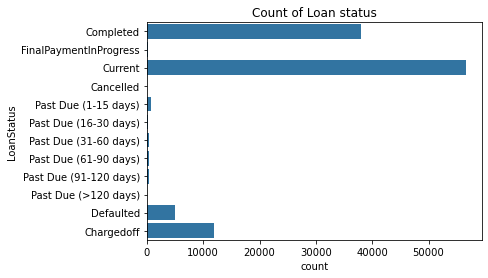

In [41]:
# The count of Loanstatus in base scale
color = sb.color_palette()[0]
sb.countplot(data = listing, y = 'LoanStatus', color = color)
plt.title('Count of Loan status');

#### Observation

- It can be observed that the count range for the loan status levels is really wide and cannot be properly displayed on a linear scale.
- The lowest count value is 5 for cancelled while the largest count is 56576 for current


In [42]:
status_counts = listing.LoanStatus.value_counts(sort = False)
status_counts

Completed                 38074
FinalPaymentInProgress      205
Current                   56576
Cancelled                     5
Past Due (1-15 days)        806
Past Due (16-30 days)       265
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (>120 days)         16
Defaulted                  5018
Chargedoff                11992
Name: LoanStatus, dtype: int64

#### LoanStatus on a log scale
- How does the LoanStatus look like on a log scale ? 

In [43]:

status_order = status_counts.index

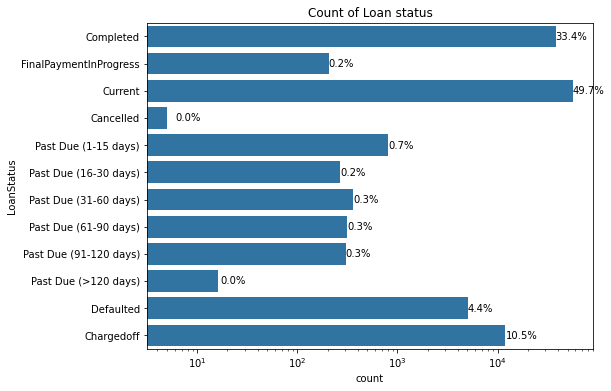

In [44]:
# The count of LoanStatus in logscale
plt.figure(figsize = (8,6))
color = sb.color_palette()[0]
sb.countplot(data = listing, y = 'LoanStatus', color = color)
plt.xscale('log')
plt.title('Count of Loan status')

# defining the rate
for i in range(status_counts.shape[0]):
    count = status_counts[i]
    n_status = sum(status_counts)
    pct_string = '{:0.1f}%'.format(100*count/n_status)
    
    # placing the text
    plt.text(count+1, i, pct_string, va = 'center')

#### Observation
- It can be observed that 49.7% of the listings are **current** while 33.4% are **completed**
- 4.4% are defaulted and 10.5% are chargedoff
- **Cancelled** and **Past Due (>120days)** showed 0.0%. This is due to the level of precision set in the text formatting. they are actually, 0.004% and 0.014% respectively. They are the least occuring status.


#### BorrowerAPR distribution
- How is the BorrowerAPR distributed ?

In [45]:
listing[['BorrowerAPR', 'BorrowerRate']].describe()

,BorrowerAPR,BorrowerRate
count,113912.000000,113937.000000
mean,0.218828,0.192764
std,0.080364,0.074818
min,0.006530,0.000000
25%,0.156290,0.134000
50%,0.209760,0.184000
75%,0.283810,0.250000
max,0.512290,0.497500


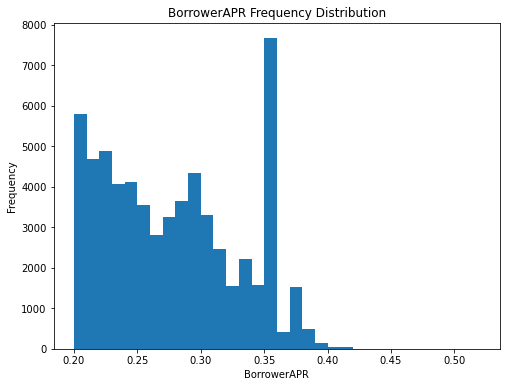

In [46]:
# Plotting the distribution of the BorrowerAPR
plt.figure(figsize = (8,6))
bin = np.arange(0.2, listing['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data = listing, x = 'BorrowerAPR', bins = bin);
plt.xlabel('BorrowerAPR')
plt.ylabel('Frequency')
plt.title('BorrowerAPR Frequency Distribution');

#### Observation

- The overall trend of the distribution is that as the Borrower Annual Percentage Rate increases the count of Loans in the dataset reduces. This is quite reasonable since most people will rather go for cheaper loans than more expensive ones. Therefore people will always device means to ensure that they pay less.

- The trend has spikes at interval as it trends downwards. The most notable spikes are at 20%, 29%, 33%, 35% and 37%.

- The spike at the 35% APR forms the highest peak of the distribution and it is very much against the trend. This is quite an interesting point and require further investigation.

- The lower boundary of the BorrowerAPR seem to be clipped at 0.20. indicating that the least annual percentage rate on the dataset is 20%  

<a id = 'other_num'></a>
### Other Numerical features


Let us consider the distribution of other numerical features in the  listing dataframe i.e  BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss and EstimatedReturn

#### BorrowerRate and LenderYield

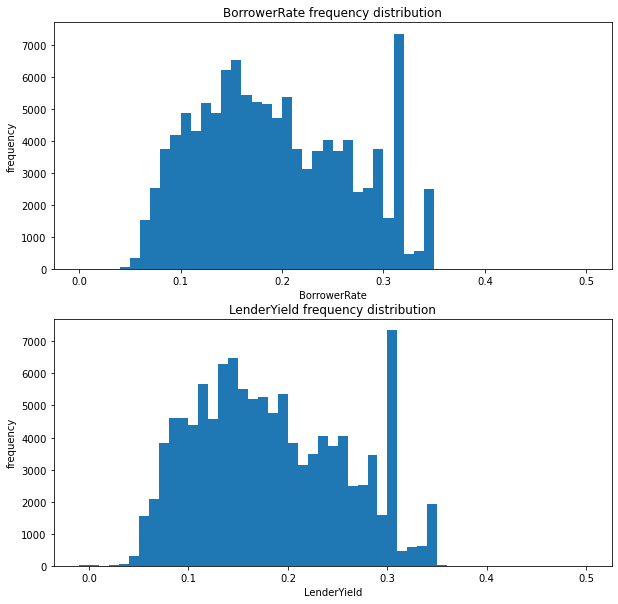

In [47]:
# Plotting the BorrowerRate and LenderYield features distribution
fig, ax = plt.subplots(nrows = 2, figsize = [10,10])

features = ['BorrowerRate', 'LenderYield']

for i in range(len(features)):
    var = features[i]
    bins = np.arange(min(listing[var]), max(listing[var])+0.01, 0.01)
    ax[i].hist(data = listing, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_title('{} frequency distribution'.format(var))
    ax[i].set_ylabel('frequency')


#### Observation

- LenderYield and BorrorwerRate has the same distribution as BorrowerAPR.

- It can be observed that the BorrowerRate and LenderYield are slightly shifted to the left with respect to the BorrowerAPR. This indicates that the three variable have the same base value. Looking through the variable definitions, it was confirmed that the Borrower's Annual Percentage Rate (BorrowerAPR) is the annualized value of the borrower's rate plus all other fee the borrower will pay for obtaining the Loan.

#### EstimatedEffectiveYield and EstimatedReturn
will the EstimatedEffectiveYield and EstimatedReturn show the same pattern as the previous numerical fields ?

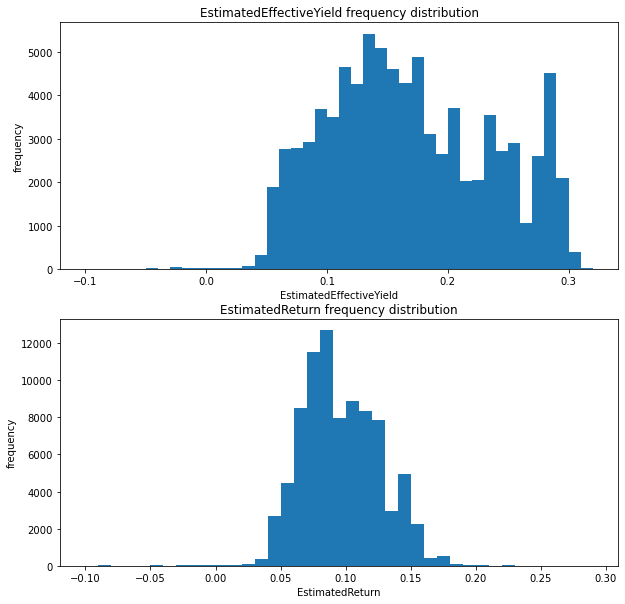

In [48]:
fig, ax = plt.subplots(nrows = 2, figsize = (10,10))

features = ['EstimatedEffectiveYield', 'EstimatedReturn']

for i in range(len(features)):
    var = features[i]
    bins = np.arange(-0.1, listing[var].max()+0.01, 0.01)
    ax[i].hist(data = listing, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('frequency')
    ax[i].set_title('{} frequency distribution'.format(var))

#### Observation

- Shows the same over all pattern as BorrowerAPR since they all have the same base value in the BorrowerRate.

- We can also observe that the distribution is further shifted to the left since it represents further deduction from the BorrowerRate.

#### EstimatedLoss
- What about the EstimatedLoss ?

(0.0, 0.25)

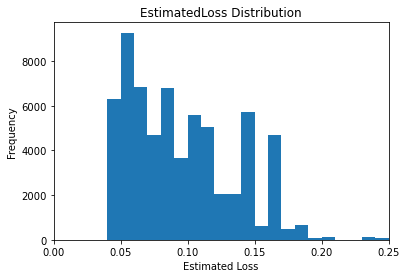

In [49]:
bin = np.arange(0.04, listing.EstimatedLoss.max()+0.01, 0.01)
plt.hist(data = listing, x = 'EstimatedLoss', bins = bin)
plt.xlabel('Estimated Loss');
plt.ylabel('Frequency')
plt.title('EstimatedLoss Distribution')
plt.xlim(0,0.25)

- This shows a similar pattern as BorrowerAPR.
- Trending downwards and suggesting that higher estimated loss value occurences are less in the distribution. Although, there are spikes at various estimated loss value ranges like around 0.16%, 0.14%, 0.11%, 0.8% and a highest peak at around 0.05%

<a id = ordered_cat></a>
### Ordered Categorical variables.
 here is the list of all ordered categorical features in our listing dataframe
 `Term`, `ProsperRating`, `CreditGrade`, `ProsperScore` and `LoanStatus`. How are they distributed ?

In [50]:
# defining the rate
for i in range(status_counts.shape[0]):
    count = status_counts[i]
   
    n_status = sum(status_counts)
    pct_string = '{:0.1f}%'.format(100*count/n_status)
    
    # placing the text
 #   plt.text(count+1, i, pct_string, va = 'center')

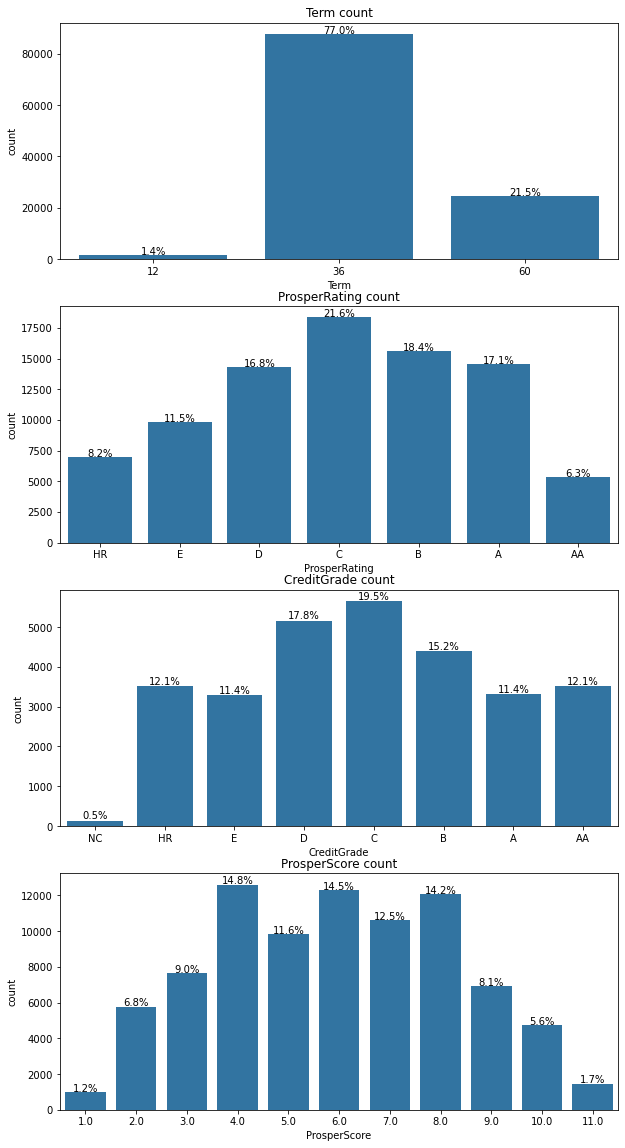

In [51]:
fig, ax = plt.subplots(nrows = 4, figsize = (10,20))


feature = ['Term', 'ProsperRating', 'CreditGrade', 'ProsperScore'] 
color = sb.color_palette()[0]

# plot for each features
for i in range(len(feature)):
    var = feature[i]
    g = sb.countplot(data = listing, x = var, ax=ax[i], color = color)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_title('{} count'.format(var))
    
    var_level_count = listing[var].value_counts(sort = False)
    n_var = sum(var_level_count)
    
# annotate the bars
    for p in g.patches:
        
        g.annotate('{:0.1f}%'.format(100*p.get_height()/n_var), 
                   (p.get_x()+p.get_width()/2, p.get_height()+50), 
                   horizontalalignment = 'center')
        

#### Observation

- Most of the categorical plots approximate to a normal distribution. where the modal class is in the center of the distribution
- ProsperScore is trimodal  with almost equal peaks at prosperscore level, 4, 6 and 8 they each have around 14% occurrence in the dataset
- ProsperRating and CreditGrade are slightly skewed to the left with more data points on the left side of the modal class. This suggest that it gets more and more difficult to obtain higher CreditGrade and ProsperScore value especially, beyond the modal class value.

<a id ='normal_cat'></a>
#### Norminal categorical Variables
-The only norminal categorical variable we have is ListingCategory. how does it look ? 

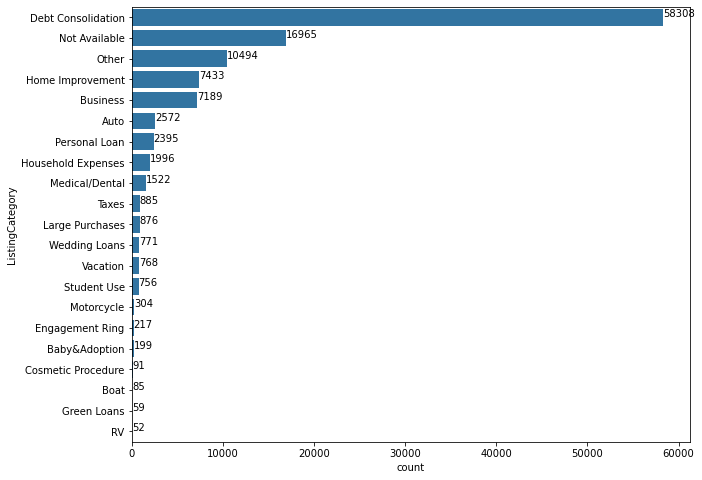

In [52]:
# value count and value count index for order
value_count = listing['ListingCategory'].value_counts()
value_count_index = value_count.index
sum_value = value_count.sum()

# plotting on  linear scale
plt. figure(figsize = (10,8))
g = sb.countplot(data = listing, y = 'ListingCategory', color = color, order = value_count_index );

# annotate the bars
for p in g.patches:
    g.annotate('{}'.format(p.get_width()), 
                ((p.get_x()+p.get_width()), p.get_y()),horizontalalignment = 'left',
                 verticalalignment = 'top')

#### Observation
- This plot shows that the major reason people use Prosper Loan srvice is for Debt Consolidation. This suggest that they have a very low BorrowerAPR as compared to other Loan service outlet. It will be a great idea to explore this further if sufficient information are available.
- The count value is spread widely form close to zero to over 58,000. It will be better to use a logarithm scale to visualize the distribution n bettter.

#### Plotting ListingCategory on a log scale

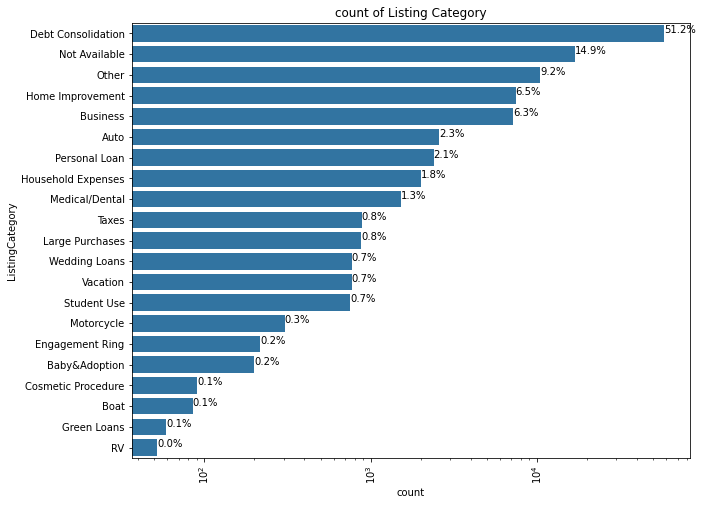

In [53]:
# plotting on  logarithmic scale
plt. figure(figsize = (10,8))


g = sb.countplot(data = listing, y = 'ListingCategory', color = color, order = value_count_index);
plt.xticks(rotation = 90);
plt.title('count of Listing Category')
plt.xscale('log');


# annotate the bars
for p in g.patches:
    g.annotate('{:.1f}%'.format(100*p.get_width()/sum_value), 
                ((p.get_x()+p.get_width()), p.get_y()),horizontalalignment = 'left',
                 verticalalignment = 'top')

#### Observation
- Debt consolidation is the single most important reason people take out loans at prosper loan and it accounts for over 50% of all loans taken between 2005 and 2014. 

In [54]:
listing.ListingCategory.info()

<class 'pandas.core.series.Series'>
RangeIndex: 113937 entries, 0 to 113936
Series name: ListingCategory
Non-Null Count   Dtype   
--------------   -----   
113937 non-null  category
dtypes: category(1)
memory usage: 112.1 KB


#### ListingCreationDate
- Can any significant pattern be observed in the ListingCreationDate distribution ?

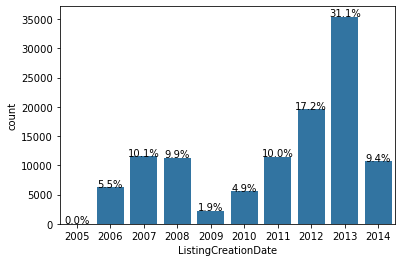

In [55]:
g = sb.countplot(data = listing, x = listing.ListingCreationDate.apply(lambda x: x.year), color = color)

total = listing.ListingCreationDate.value_counts().sum()
for p in g.patches:
    g.annotate('{:0.1f}%'.format(100*p.get_height()/total), 
                   (p.get_x()+p.get_width()/2, p.get_height()+50), 
                   horizontalalignment = 'center')


#### Observation
- Two significant bar stands out. 
    - In 2009, they processed the least number of loans at 1.9% of the total listing in the dataset and just around 3000 listings 
    - In 2013, they processed 31.1% of entire loans in this dataset and over 35000 loans were listed.
    
- There seem to have been an overall increase per year in the number of loans processed although, there was a significant dip in 2014

<a id = 'bor_profile'></a>
### borrowers_profile
We will consider some selected features from this table that are percieved to have strong implication on BorrowersAPR. They are chosen based on their importance in the loan application process itself.

Some of these features are as followers;

<ul>
<li><a href = '#BorrowerState'> BorrowerState </a></li>
<li><a href = '#Occupation'> Occupation </a></li>
<li><a href = '#EploymentStatus'> EmploymentStatus </a></li>
<li><a href = '#IsBorrowerHomeowner'> IsBorrowerHomeowner </a></li>
<li><a href = '#CreditScore'> CreditScore </a></li>
<li><a href = '#DebtToIncomeRatio'> DebtToIncomeRatio </a></li>
<li><a href = '#StatedMonthlyIncome'> StatedMonthlyIncome </a></li>
<li><a href = '#CurrentCreditLines'> CurrentCreditLines and OpenCurrentCreditLines </a></li>
   <li><a href='#Univariate'> Return </a></li>
</ul>
    
    

#### Borrower's Categorical Classification
We will consider these set of 4 qualities, ``Occupation``, ``EmploymentStatus``, ``IsBorrowerHomeowner`` and ``BorrowerState``. The first three are critical considration in the application process while the State charcteristics  is also important because it might reveal the geographic distribution of borrowers across the US states.

#### Four Functions
We will visually explore these set of categorical plot using these set of four functions

The four functions are: 
- `count_plotterv` will create a vertical plot which will be annotated with `annotate_vertical`.
- `count_plotterh` will create a horizontal plot which will be annotated with `annotate_horizontal`.

In [56]:
def count_plotterv(df,var,title):
    
    '''
    Plots and title a vertical countplot
    
    args: 
    df (DataFrame): The dataframe containing the qualitative 
                   variable of interest
    var (string): The name of the column of the qualtative 
                  feature of interest
    title ('string'); The title of the plot
    
    
    return:
    g(seaborn plot object): returns the seaborn plot object for further 
                           customization of the plot
    '''
   



    # value count and value count index for order
    value_count = df[var].value_counts()
    value_count_index = value_count.index
    sum_value = value_count.sum()
    # plotting the count of the variable levels
    plt.figure(figsize = (10,5))
    color = sb.color_palette()[0]
    g = sb.countplot(data = df, x = var, 
                 color = color, order =value_count_index )
    plt.title(title)
    return(g)

In [57]:
def count_plotterh(df,var,title):
    
    '''
    Plots and title a horizontal countplot
    
    args: 
    df (DataFrame): The dataframe containing the qualitative 
                   variable of interest
    var (string): The name of the column of the qualtative 
                  feature of interest
    title ('string'); The title of the plot
    
    
    return:
    g(seaborn plot object): returns the seaborn plot object for further 
                           customization of the plot
    '''
   



    # value count and value count index for order
    value_count = df[var].value_counts()
    value_count_index = value_count.index
    sum_value = value_count.sum()
    # plotting the count of the variable levels
    plt.figure(figsize = (10,20))
    color = sb.color_palette()[0]
    g = sb.countplot(data = df, y = var, 
                 color = color, order =value_count_index )
    plt.title(title)
    return(g)

In [58]:
# annotate the bars

def annotate_vertical(g):
    '''
    annotate the plot with the percentage value of each bar.
    
    args:
    g(seaborn plot object):The plot object returned by the plotter function
    '''
    for p in g.patches:

        g.annotate('{:0.1f}%'.format(100*p.get_height()/sum_value), 
                       (p.get_x()+p.get_width()/2, p.get_height()+50), 
                       horizontalalignment = 'center')
   
       


In [59]:
# annotate the bars
def annotate_horizontal(g):
    '''
    annotate the plot with the percentage valu of each bar.
    
    args:
    g(seaborn plot object):The plot object returned by the plotter function
    '''
    for p in g.patches:
        g.annotate('{:.1f}%'.format(100*p.get_width()/total), 
                ((p.get_x()+p.get_width()), p.get_y()),horizontalalignment = 'left',
                 verticalalignment = 'top')

<a id = 'BorrowerState'></a>
#### Visually Exploring the BorrowerState column
Which state has the largest count in the dataset ?

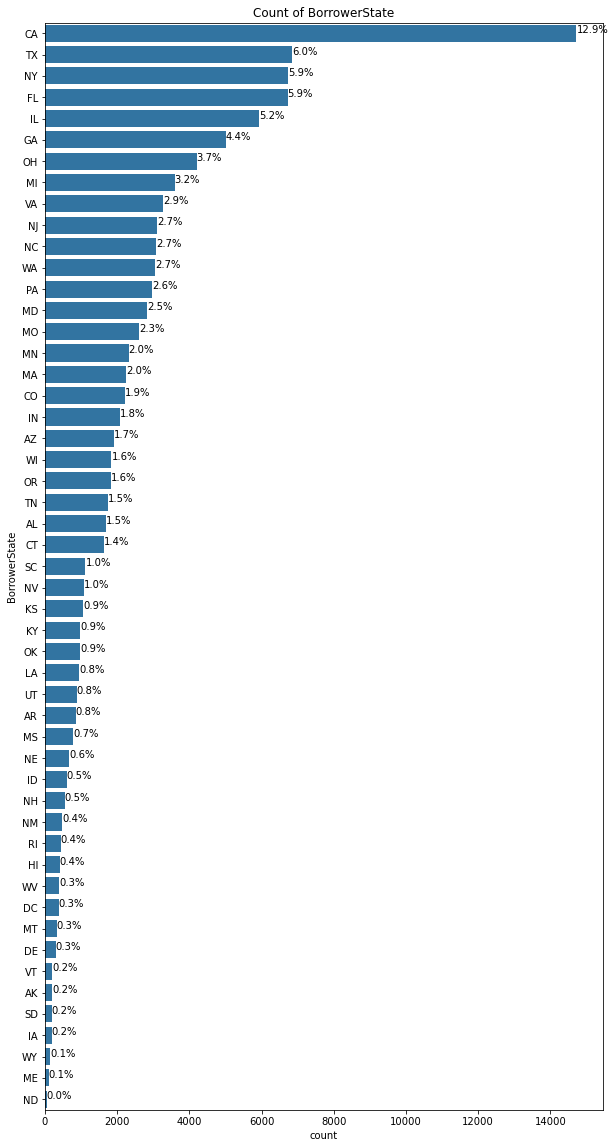

In [60]:
# plot the  count of BorrowerState.
state = count_plotterh(borrowers_profile, 'BorrowerState', 'Count of BorrowerState')
annotate_horizontal(state)

#### Observation
- California state is the state with the highest count in the BorrowerState column by a wide margin.
- North Dakorta is the state with least count.

<a id = 'Occupation'></a>
#### Visually Exploring the Occupation column

Which group of professional use the prosper funding service the most ?


There are two outlier levels in the Occupation field. Other and Professional. They will be filtered out as they do not represent any particular occupation. 

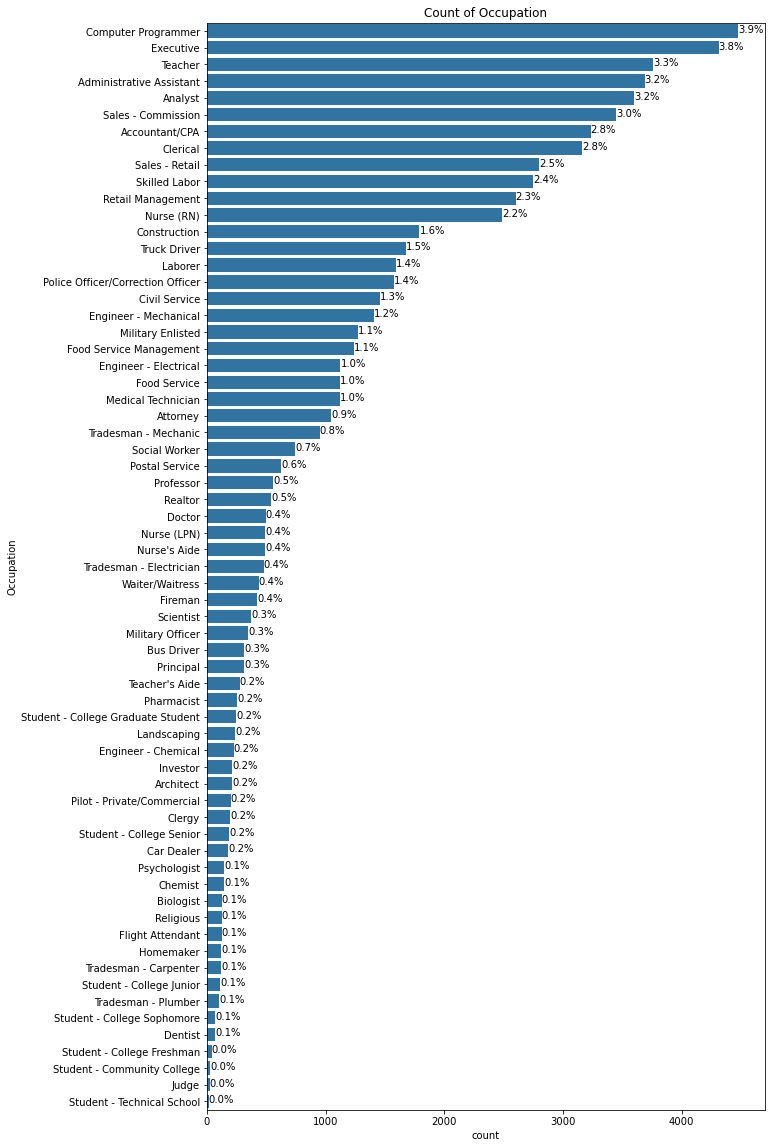

In [61]:
# filtering out observations with Occupation value, 'Other' and 'Professional'
occupation_list = ['Other', 'Professional']
borrowers_profile_subset = borrowers_profile[~borrowers_profile['Occupation'].isin(occupation_list)]

# plot the  count of Occupation.
state = count_plotterh(borrowers_profile_subset, 'Occupation', 'Count of Occupation')
annotate_horizontal(state)

#### Observation
- Computer Programmers are the most people using the Prosper loan service. Followed by executives. This might explain why California state is the state with highest count in the BorrowerState column. 

<a id = 'EmploymentStatus'></a>
#### Visually Exploring the EmploymentStatus

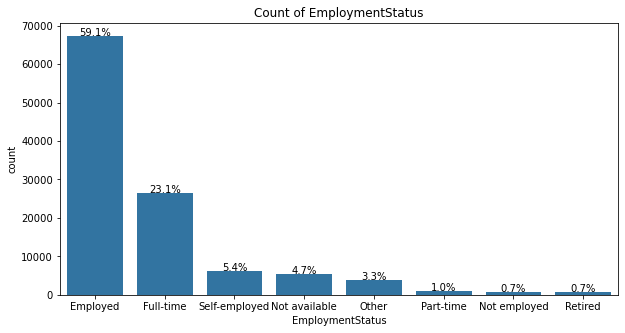

In [62]:
# plot the  count of EmploymentStatus.
state = count_plotterv(borrowers_profile, 'EmploymentStatus', 'Count of EmploymentStatus')
annotate_vertical(state)

#### Observation
People who are employed and actively in service tend to get more access to loans as compared to those who are unemployed or retired.

Also, those employed in formal establishment gets more access to loan as compared to those who are self employed 

<a id = 'IsBorrowerHomeowner'></a>
#### Visually Exploring the IsBorrowerHomeowner

What is the distribution of homeowners ?

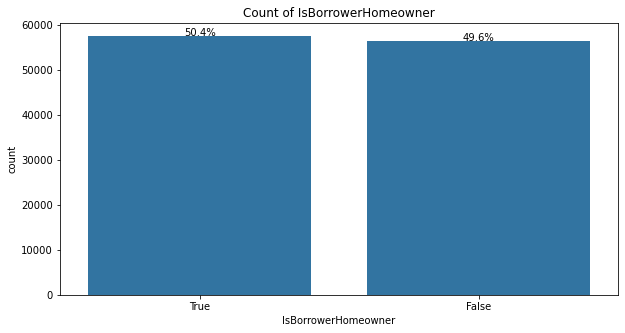

In [63]:
# plot the  count of IsBorrowerHomeowner.
state = count_plotterv(borrowers_profile, 'IsBorrowerHomeowner', 'Count of IsBorrowerHomeowner')
annotate_vertical(state)

#### Observation
There are just as much homeowners as those who don't own a home in the dataset

### <a id = 'CreditScore'></a>
#### Visually exploring the CreditScore.
The credit score value typically range between 300 and 850 and represents the credit risk of an individual and how likely is an individual to pay bills on time.

- It was observed that there were 133 rows with CreditscoreRangeUpper values at 19 and CreditscoreRangeLower values at 0 These observations will be filtered out, since credit score value should naturally range between 300 and 850.

In [64]:
borrowers_profile[['CreditScoreRangeLower','CreditScoreRangeUpper']][(borrowers_profile['CreditScoreRangeUpper'] < 300)].describe()

,CreditScoreRangeLower,CreditScoreRangeUpper
count,133.0,133.0
mean,0.0,19.0
std,0.0,0.0
min,0.0,19.0
25%,0.0,19.0
50%,0.0,19.0
75%,0.0,19.0
max,0.0,19.0


In [65]:
# filtering out credit score values less than 300
borrowers_profile= borrowers_profile[~(borrowers_profile['CreditScoreRangeUpper'] < 300)]

# summary statistics of Differences between the CreditScoreRangUpper and CreditScoreRangeLower
(borrowers_profile['CreditScoreRangeUpper']-borrowers_profile['CreditScoreRangeLower']).describe()

count    113213.0
mean         19.0
std           0.0
min          19.0
25%          19.0
50%          19.0
75%          19.0
max          19.0
dtype: float64

In [66]:
# Summary statistics of the CreditScoreRangeLower
borrowers_profile['CreditScoreRangeLower'].describe()

count    113213.000000
mean        686.373120
std          62.201999
min         360.000000
25%         660.000000
50%         680.000000
75%         720.000000
max         880.000000
Name: CreditScoreRangeLower, dtype: float64

In [67]:
# Summary statistics of the CreditScoreRangeUpper
borrowers_profile['CreditScoreRangeUpper'].describe()

count    113213.000000
mean        705.373120
std          62.201999
min         379.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

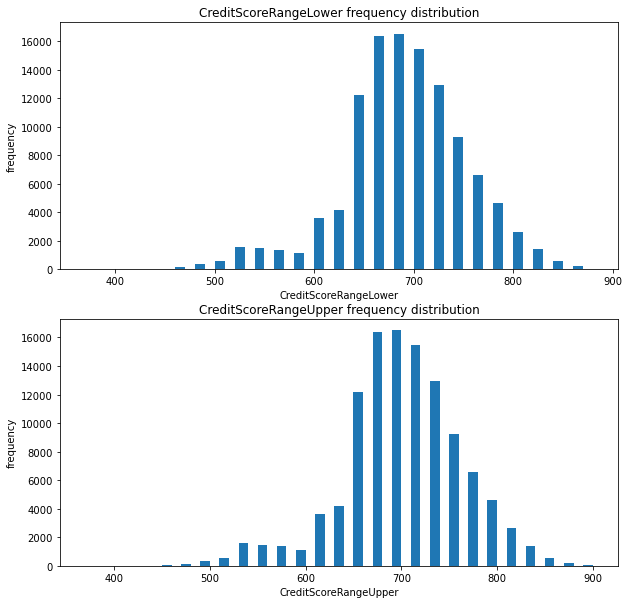

In [68]:
# Plotting the distribution of CreditScoreRangeUpper and CreditScoreRangeLower
fig, ax = plt.subplots(nrows = 2, figsize = (10,10))

features = ['CreditScoreRangeLower', 'CreditScoreRangeUpper']

for i in range(len(features)):
    var = features[i]
    bins = np.arange(370, borrowers_profile[var].max()+10, 10)
    ax[i].hist(data = borrowers_profile, x = var, bins = bins)
    ax[i].set_xlabel('{}'.format(var))
    ax[i].set_ylabel('frequency')
    ax[i].set_title('{} frequency distribution'.format(var))

#### Observation

- It can be observed that the modal credit score value ranges between 660 and 720.

- It can also be observed that there is a slightly longer tale to the left of the modal class. However, more of the population in the dataset are on the right side of the distributon.

<a id = 'DebtToIncomeRatio'></a>
#### DebtToIncomeRatio  
what is the destribution of the DebtToIncomeRatio ?

In [69]:
borrowers_profile.DebtToIncomeRatio.describe()

count    105311.000000
mean          0.276075
std           0.551883
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

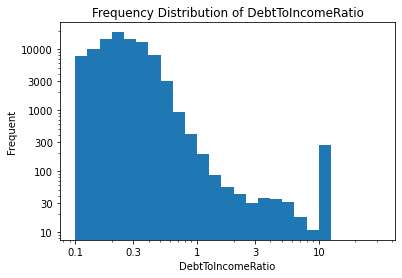

In [70]:
#Plotting the DebtToIncomeRatioof DTI_normal
bin = 10**np.arange(-1, 1.5+0.1, 0.1) 
plt.hist(data = borrowers_profile, x ='DebtToIncomeRatio', bins = bin)
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Frequent')
plt.title('Frequency Distribution of DebtToIncomeRatio')
xticks = [0.1, 0.3, 1, 3, 10]
yticks = [10, 30, 100, 300,1000,3000,10000]
plt.xscale('log')
plt.yscale('log')
plt.xticks(xticks, xticks)
plt.yticks(yticks, yticks);

#### Observations
- According to the variable defination document, the DebtToIncomeRatio has been been capped at 10.01. i.e. 1001% we can oberve this by the sharp spike at that point.

- Also, the visualisation has been truncated at the lower end, on the left. 

- The distribution is skewed to the right, with the modal cass around 0.3 1.e 30% Debt to income ratio. 

<a id = 'StatedMonthlyIncome'></a>
#### StatedMonthlyIncome

In [71]:
borrowers_profile['StatedMonthlyIncome'].describe()

count    1.138040e+05
mean     5.611754e+03
std      7.481310e+03
min      0.000000e+00
25%      3.208333e+03
50%      4.666667e+03
75%      6.833333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

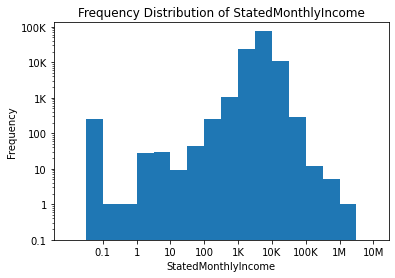

In [72]:
#Plotting the StatedMonthlyIncome DTI_normal
bin = 10**np.arange(-2, 7+0.5, 0.5) 
plt.hist(data = borrowers_profile, x ='StatedMonthlyIncome', bins = bin)
plt.xlabel('StatedMonthlyIncome')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of StatedMonthlyIncome')
xticks = [0.1,1,10,100,1000,10000, 100000,1000000,10000000]
x_labels = ['0.1', '1', '10', '100', '1K', '10K', '100K', '1M', '10M']
yticks = [0.1,1,10,100,1000,10000, 100000]
y_labels = ['0.1', '1', '10', '100', '1K', '10K', '100K']
plt.xscale('log')
plt.yscale('log');
plt.xticks(xticks, x_labels)
plt.yticks(yticks,y_labels);

#### Observation
- The distribution is slightly skewed to the left 
- with a modal class around 3000 dollars stated income.

<a id = 'CurrentCreditLines'></a>
#### CurrentCreditLines and OpenCreditLines

**CurrentCreditLines**

In [73]:
borrowers_profile[['CurrentCreditLines', 'OpenCreditLines']].describe()

,CurrentCreditLines,OpenCreditLines
count,106333.000000,106333.000000
mean,10.317192,9.260164
std,5.457866,5.022644
min,0.000000,0.000000
25%,7.000000,6.000000
50%,10.000000,9.000000
75%,13.000000,12.000000
max,59.000000,54.000000


In [74]:
def hist_plotter(df, feature_list, nrows, bin_lower, binsize):
    '''
     Plots the distribution of a list of features
     
     Args:
     df(DataFrame): The dataFrame containing the feature of interest.
     feature_list(list): A list of feature whose distribution is to be plotted
     nrows(int): The number of rows of the plot based on the number of variables in the feature_list
     bin_lower(int or float): The lower boundary of the bin
     binsize(int or float): The size of each bin in the plot
     
     
     returns:
     ret(list): a list of plot object
     
    
    '''
    features = feature_list
    
    if nrows == 1:
        bins = np.arange(bin_lower, df[features[0]].max()+binsize, binsize) 
        g = plt.hist(data = df, x = features[0], bins = bins)
        plt.xlabel('{}'.format(features[0]))
        plt.ylabel('frequency')
        plt.title('{} frequency distribution'.format(features[0]))
    
    else:

        fig, ax = plt.subplots(nrows = nrows, figsize = (10,10))

   
    

        for i in range(len(features)):
            ret = []
            var = features[i]
            bins = np.arange(bin_lower, df[var].max()+binsize, binsize)
            g = ax[i].hist(data = df, x = var, bins = bins)
            ax[i].set_xlabel('{}'.format(var))
            ax[i].set_ylabel('frequency')
            ax[i].set_title('{} frequency distribution'.format(var))
            
    
    return(g)   
    

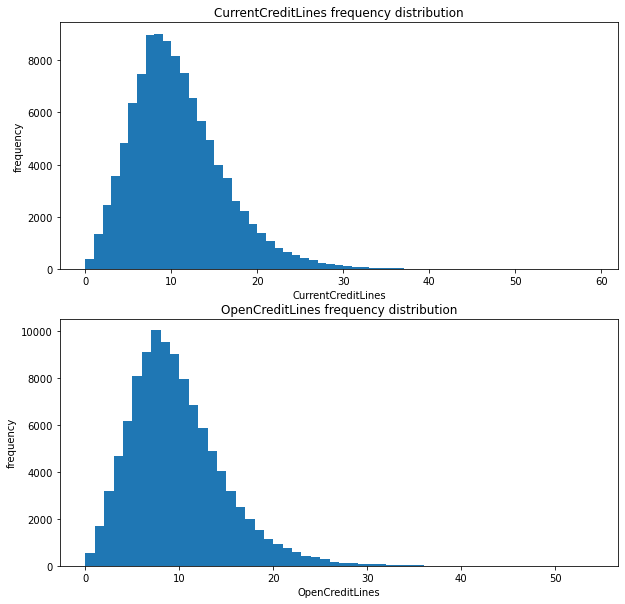

In [75]:
# Plotting the CurrentCreditLines and OpenCreditLines.
feature_list = ['CurrentCreditLines', 'OpenCreditLines']
hist_plotter(borrowers_profile, feature_list, 2, 0, 1);

#### Observations

- Modal class is between 10 and 11 with the distribution slightly skewed to the right. 

- The OpenCreditLines distribution is exactly the same as the CurrentCreditLines but it is shifted to the left.

<a id = 'uni_loan'></a>
### Loan
The loan dataframe contains information about the loan and some historical information about the borrower's loan activity on the prosper platform.

Some of the features of interest here can be categorized into three:
    
<li><a href = '#history'>The borrowers loan history with Prosper </a>e.g. TotalProperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate,ScorexChangeAtTimeOfListing </li>
<li><a href = '#loan_status'>The current loan status </a> e.g.  LoanCurrentDaysDelinquent, LoanOriginalAmount, MonthlyLoanPayment </li>
 <li><a href = '#charges'>The current loan charges </a>e.g. LP_CustomerPayments, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss</li>
 
 <li><a href='#Univariate'> Return </a></li> 

<a id = history></a>
### The borrowers loan history with Prosper

#### TotalProsperLoans, TotalProsperPaymentsBilled and OnTimeProsperPayments

In [76]:
loan[['TotalProsperLoans', 'TotalProsperPaymentsBilled', 'OnTimeProsperPayments']].describe()

,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments
count,22085.000000,22085.000000,22085.000000
mean,1.421100,22.934345,22.271949
std,0.764042,19.249584,18.830425
min,0.000000,0.000000,0.000000
25%,1.000000,9.000000,9.000000
50%,1.000000,16.000000,15.000000
75%,2.000000,33.000000,32.000000
max,8.000000,141.000000,141.000000


#### TotalProsperLoans

In [77]:
loan['TotalProsperLoans'].describe()

count    22085.000000
mean         1.421100
std          0.764042
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: TotalProsperLoans, dtype: float64

(array([1.0000e+00, 1.5538e+04, 4.5400e+03, 1.4470e+03, 4.1700e+02,
        1.0400e+02, 2.9000e+01, 9.0000e+00]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 <BarContainer object of 8 artists>)

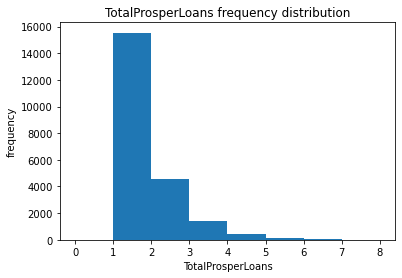

In [78]:
feature_list = ['TotalProsperLoans']
hist_plotter(loan, feature_list, 1, 0, 1)

#### Observations
- The modal class is between 1 and 2. Indicating that, most people have 1 to 2 loans on prosper partform before this application
- The distribution is skewed to the right indicating that there are less number of borrowers with higher number of prior loans.

In [79]:
# plotting TotalProsperPaymentsBilled, OnTimeProsperPayments

#### TotalProsperPaymentsBilled and OnTimeProsperPayments

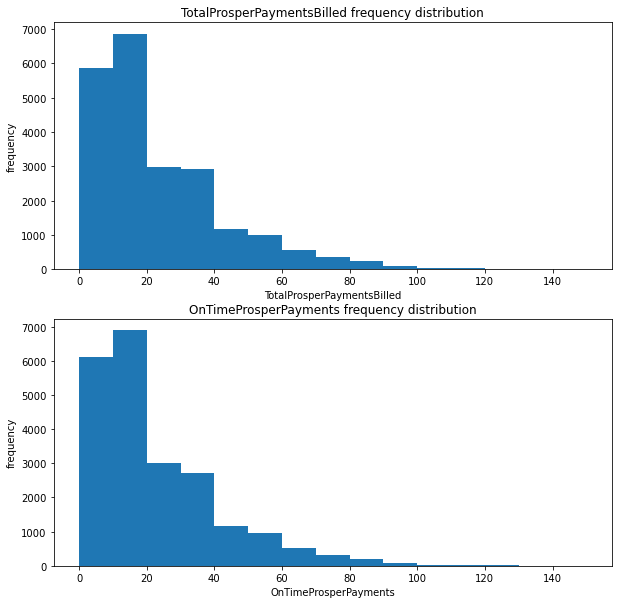

In [80]:
feature_list = ['TotalProsperPaymentsBilled', 'OnTimeProsperPayments']
hist_plotter(loan, feature_list, 2, 0, 10);

#### Observations
- The distribution is skewed to the left with the modal class between 10 and 20 i.e most borrowers have made upto 10 to 20 on time payments. 

#### ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate

In [81]:
loan['ProsperPaymentsLessThanOneMonthLate'].describe()

count    22085.000000
mean         0.613629
std          2.446827
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         42.000000
Name: ProsperPaymentsLessThanOneMonthLate, dtype: float64

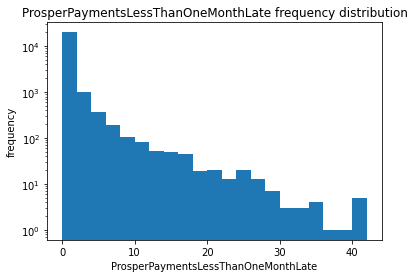

In [82]:
feature_list = ['ProsperPaymentsLessThanOneMonthLate']
hist_plotter(loan, feature_list, 1, 0, 2)
plt.yscale('log')

#### Observation
- The modal class is 0 to 2 which indicates that most people make their payments on time.
- The distribution is skewed to right. also showing that the number of people who make their payments late reduces as the lateness duration increases.

In [83]:
loan['ProsperPaymentsOneMonthPlusLate'].describe()

count    22085.000000
mean         0.048540
std          0.556285
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.000000
Name: ProsperPaymentsOneMonthPlusLate, dtype: float64

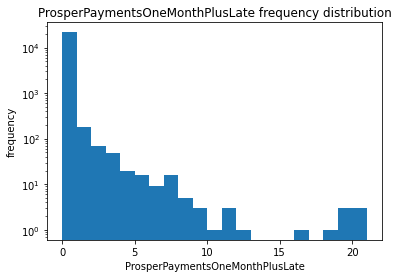

In [84]:
feature_list = ['ProsperPaymentsOneMonthPlusLate']
hist_plotter(loan, feature_list, 1, 0, 1)
plt.yscale('log')

#### Observation
- The modal class is 0 to 2 which indicates that most people make their payments on time.
- The distribution is skewed to right. also showing that the number of people who make their payments late reduces as the lateness duration increases.

#### ScorexChangeAtTimeOfListing

In [85]:
loan['ScorexChangeAtTimeOfListing'].describe()

count    18928.000000
mean        -3.223214
std         50.063567
min       -209.000000
25%        -35.000000
50%         -3.000000
75%         25.000000
max        286.000000
Name: ScorexChangeAtTimeOfListing, dtype: float64

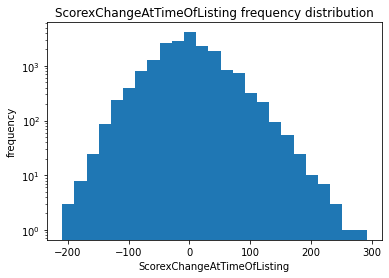

In [86]:
feature_list = ['ScorexChangeAtTimeOfListing']
hist_plotter(loan, feature_list, 1, -209, 20)
plt.yscale('log')

#### Observations
-This almost approximates a normal distribution with the mean at zero.

<a id = 'loan_status'></a>
### The current loan status

In [87]:
loan[['LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'MonthlyLoanPayment']].describe()

,LoanCurrentDaysDelinquent,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,113937.00000,113937.000000
mean,152.816539,8337.01385,272.475783
std,466.320254,6245.80058,192.697812
min,0.000000,1000.00000,0.000000
25%,0.000000,4000.00000,131.620000
50%,0.000000,6500.00000,217.740000
75%,0.000000,12000.00000,371.580000
max,2704.000000,35000.00000,2251.510000


#### LoanOriginalAmount

In [88]:
loan['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

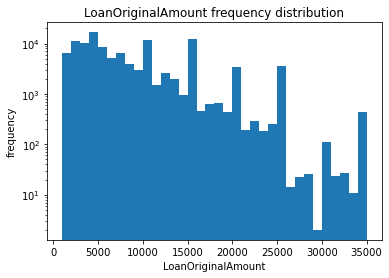

In [89]:
feature_list = ['LoanOriginalAmount']
hist_plotter(loan, feature_list, 1, 1000, 1000);
plt.yscale('log')

#### Observations
 - The modal class is between 5000 to 6000 dollars. 
 - The distribution is skewed to the right. and the overall trend is that lesser amount of people take up larger loans.
 - There is a spike at every 5000 dollar value. It seems more people obtain loans in rounded figure values.

#### MonthlyLoanPayment 

In [90]:
loan[['MonthlyLoanPayment']].describe()

,MonthlyLoanPayment
count,113937.000000
mean,272.475783
std,192.697812
min,0.000000
25%,131.620000
50%,217.740000
75%,371.580000
max,2251.510000


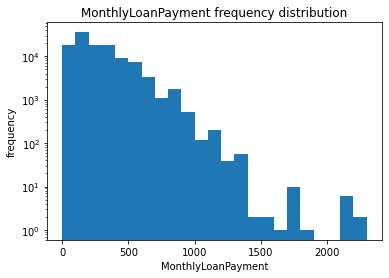

In [91]:
feature_list = ['MonthlyLoanPayment']
hist_plotter(loan, feature_list, 1, 0, 100)
plt.yscale('log')

#### Observations
- It can be observed that most MonthlyLoanPayment are in 100s of dollars. with modal class being the class between 100 and 200 dollars.
- The distribution is skewed to the right. indicating that lesser amount of the population make high monthly loan payment.

In [92]:
loan['LoanCurrentDaysDelinquent'].describe()

count    113937.000000
mean        152.816539
std         466.320254
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2704.000000
Name: LoanCurrentDaysDelinquent, dtype: float64

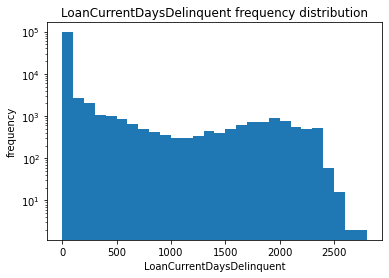

In [93]:
feature_list = ['LoanCurrentDaysDelinquent']
hist_plotter(loan, feature_list, 1, 0, 100)
plt.yscale('log')

#### Observation
- The majority of the population make thier payment promptly, and are never delinquent.
- The distribution is rather flat, with a deep in the centre around 1000days.

#### LoanMonthsSinceOrigination

In [94]:
loan['LoanMonthsSinceOrigination'].describe()

count    113937.000000
mean         31.896882
std          29.974184
min           0.000000
25%           6.000000
50%          21.000000
75%          65.000000
max         100.000000
Name: LoanMonthsSinceOrigination, dtype: float64

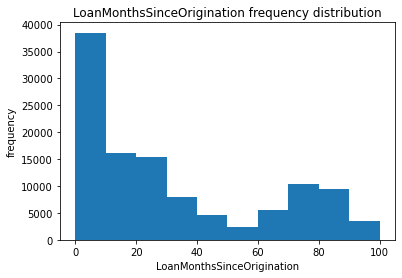

In [95]:
feature_list = ['LoanMonthsSinceOrigination']
hist_plotter(loan, feature_list, 1, 0, 10);

#### Observations
- Most of the loans captured in this dataset are in their first ten months.

<a id = 'charges'></a>
### The current loan charges

#### LP_CustomerPayments

In [96]:
loan['LP_CustomerPayments'].describe()

count    113937.000000
mean       4183.079489
std        4790.907234
min          -2.349900
25%        1005.760000
50%        2583.830000
75%        5548.400000
max       40702.390000
Name: LP_CustomerPayments, dtype: float64

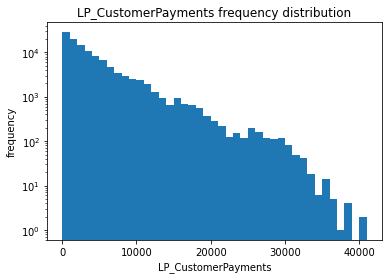

In [97]:
feature_list = ['LP_CustomerPayments']
hist_plotter(loan, feature_list, 1, 0, 1000);
plt.yscale('log')

#### Observation
 -The modal class is between 0 and 1000. This is reasonable since most of the loans are in their first ten months and most monthly payments are in hundreds of dollars. 

#### LP_InterestandFees

In [98]:
loan['LP_InterestandFees'].describe()

count    113937.000000
mean       1077.542901
std        1183.414168
min          -2.349900
25%         274.870000
50%         700.840100
75%        1458.540000
max       15617.030000
Name: LP_InterestandFees, dtype: float64

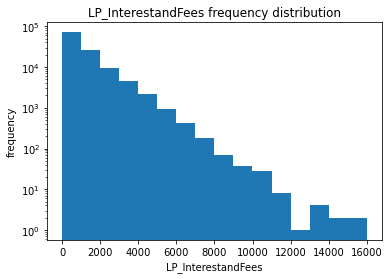

In [99]:
feature_list = ['LP_InterestandFees']
hist_plotter(loan, feature_list, 1, -2, 1000);
plt.yscale('log')

#### Observations
 - The modal class is again between 0 and 1000. since most of the customer payments

<a id = 'uni_disc'></a>
### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The LoanStatus feature has a large difference in the count of the categories. Therefore, I looked at the data using log transform. It was observed that 49.7% of the loans are current, 33.4% of the Loans are completed, 10.5% are charged off.

> The BorrowerAPR feature has an overall trend that is skewed to the right. This shows that the population is higher at lower BorrowerAPR and lower at higher BorrowerAPR. However, there are spikes along these trends that are higher than the surrounding regions. Also, it is interesting to note that the modal class is  between 0.35 and 0.36 which is very muchagainst the trend.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The CreditScoreRangeLower and CreditScoreRangeUpper typically should range between 300 and 850. However, there were some CreditScoreRangeLower values of 19 and CreditScoreRangeUpper values of 0. This must have been due to some entry errors. These set of values has been removed going forward.

<li><a href='#Univariate'> Return </a></li> 

<a id = 'Bivariate'></a>
## Bivariate Exploration

We will take the same approach as before by observing the pairs in their observational units. However, most of the emphasis will be on the **listing** DataFrame.

Then we will observe the pair of other features in the other two data frame (i.e) with respect to the target variables.

#### Major subheadings

<ul>
<li><a href = '#numerical'> Numerical Variables in the listing DataFrame </a></li>
<li><a href = '#loan_num'> LoanStatus and numerical variables</a></li>
<li><a href = '#BI_APR'> BorrowerAPR and Categorical variables</a></li>
<li><a href = '#loan_cat'> Loan Status and Categorical Variable</a></li>
<li><a href = '#time_targ'> Time and Target Features</a></li>
<li><a href = '#borr_targ'> borrowers_profile and Target Features</a></li>
<li><a href = '#credit_feat'> CreditScore and other features</a></li>
<li><a href = '#bi_discuss'> Discussion</a></li>
</ul>

<li><a href='#intro'> Home</a></li>

In [100]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ListingKey               113937 non-null  object        
 1   ListingNumber            113937 non-null  int64         
 2   ListingCreationDate      113937 non-null  datetime64[ns]
 3   CreditGrade              28953 non-null   category      
 4   Term                     113937 non-null  category      
 5   LoanStatus               113937 non-null  category      
 6   ClosedDate               55089 non-null   datetime64[ns]
 7   BorrowerAPR              113912 non-null  float64       
 8   BorrowerRate             113937 non-null  float64       
 9   LenderYield              113937 non-null  float64       
 10  EstimatedEffectiveYield  84853 non-null   float64       
 11  EstimatedLoss            84853 non-null   float64       
 12  EstimatedReturn 

<a id = 'numerical'></a>
#### Numerical Variables in the listing DataFrame 

In [101]:
# Dividing the features in the listing DataFrame into numerical and categorical variable
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'LenderYield', 
                'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn']
categoric_vars = ['CreditGrade', 'Term', 'LoanStatus', 
                  'ProsperRating', 'ProsperScore', 'ListingCategory' ]

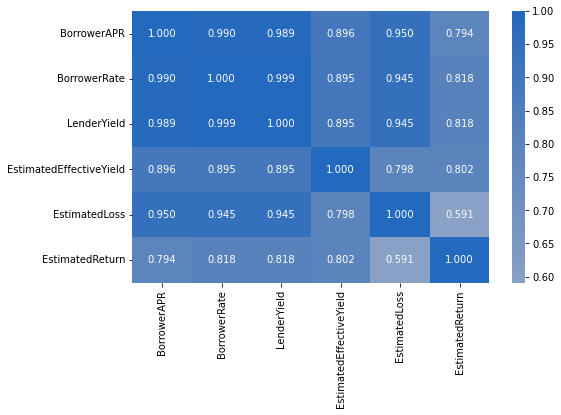

In [102]:
# Corrlation plot
plt.figure(figsize = [8,5])
sb.heatmap(listing[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

listing.shape (113937, 16)
listing_samp.shape = (500, 16)


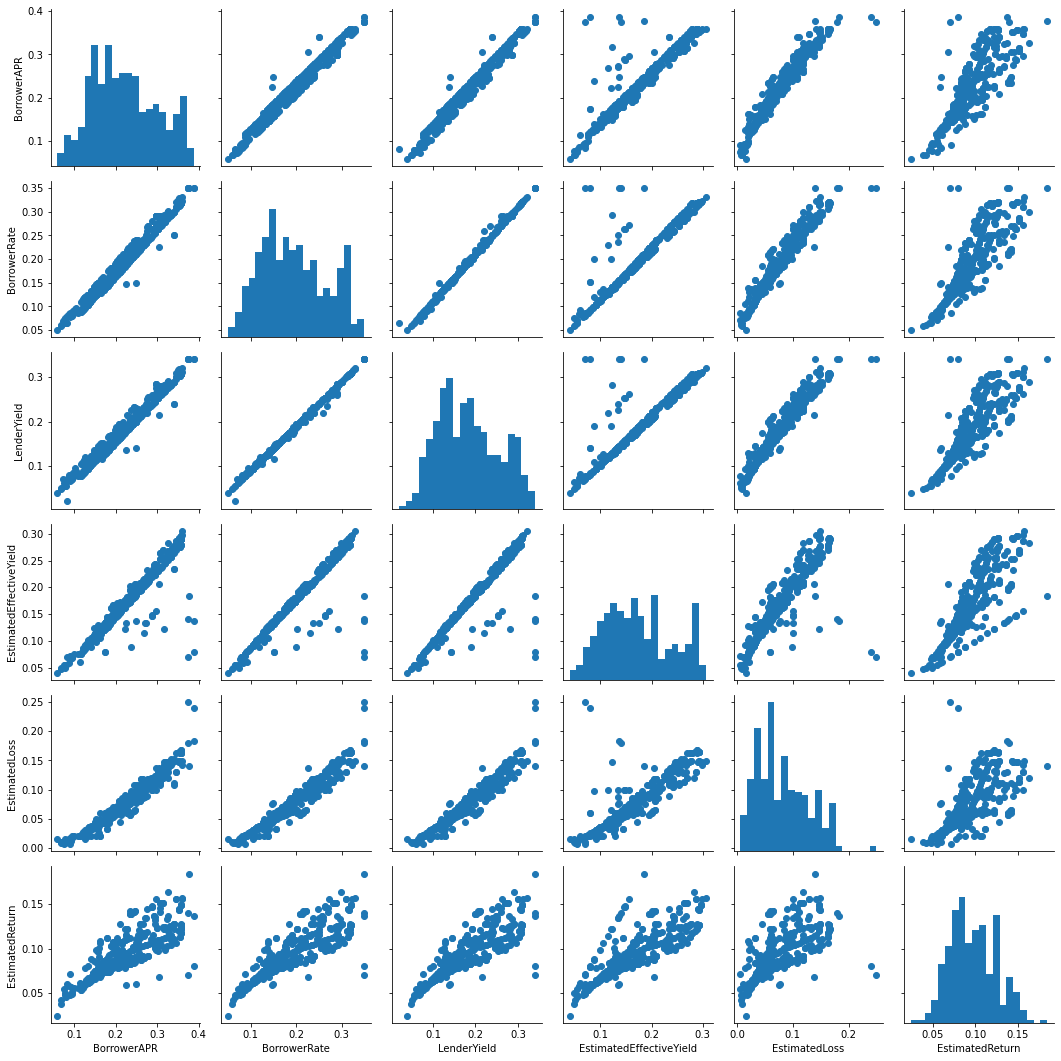

In [103]:
# plot matrix: sample 500 data point so that the plots are clearer and they render faster
print('listing.shape',listing.shape)
listing_samp = listing.sample(n = 500, replace = False)
print('listing_samp.shape =', listing_samp.shape)

g = sb.PairGrid(data = listing_samp, vars = numeric_vars)
g= g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);


#### Observation
As expected, BorrowersRate, LendersYield, and EstimatedEffectiveYield all show strong correlation with BorrowersAPR. The correlation is not as perfect for EstimatedEffectiveYield that has several outliers. However, the outliers all show the same pattern by being on the same side of the more regular plot points.

EstimatedReturn and Estimated loss show lesser correlation with BorrowersAPR as compared with the previous set of variables. Although, they are also positively correlated.

<a id = 'loan_num'></a>
#### LoanStatus and numerical variables.

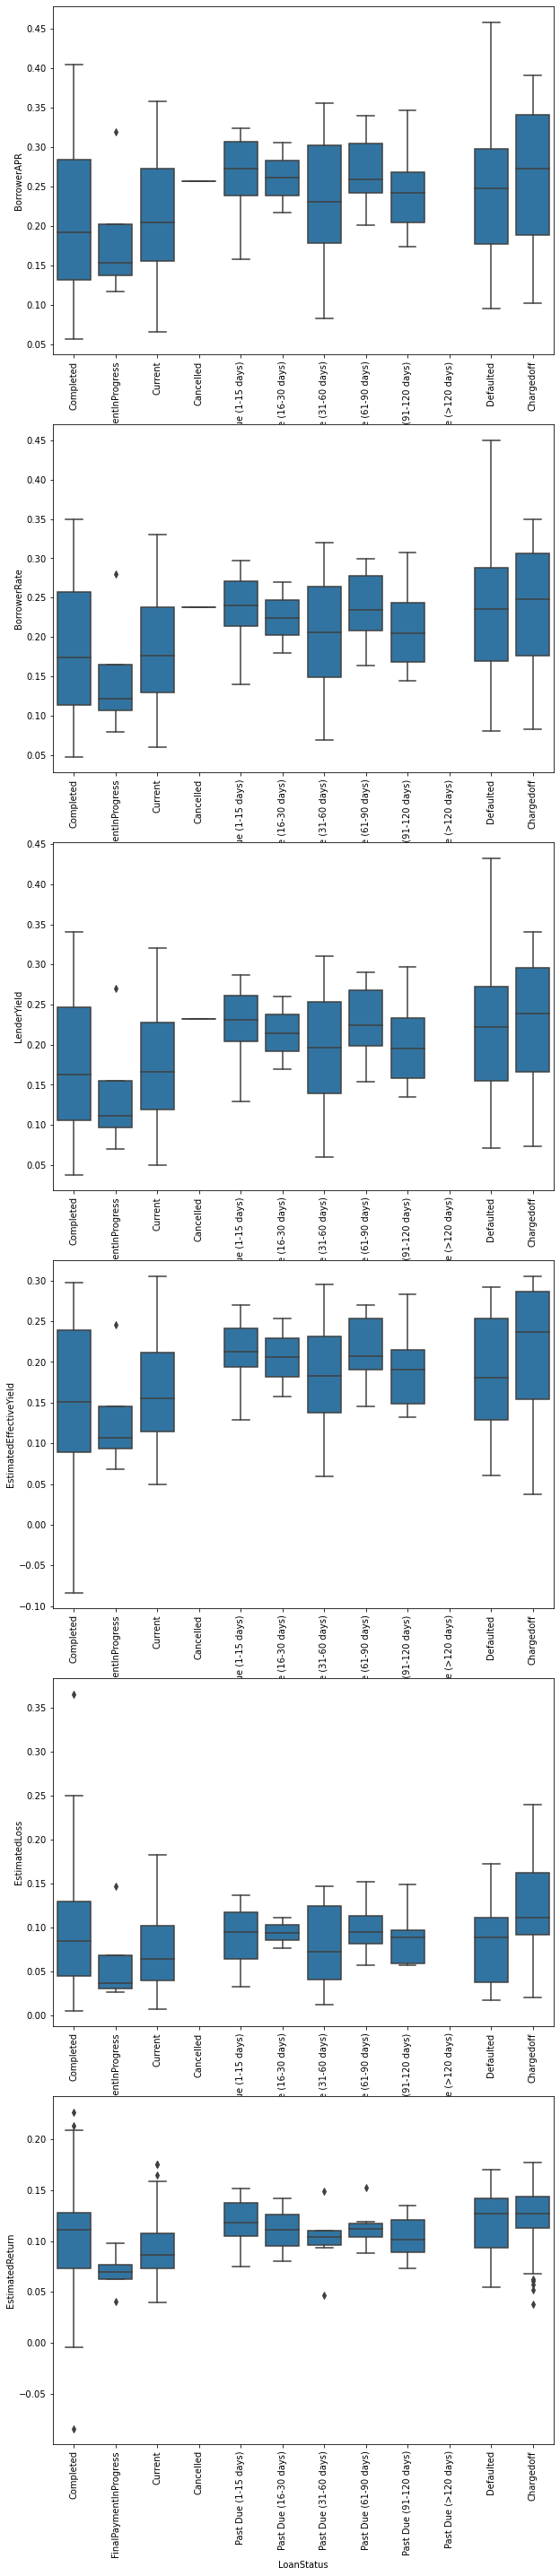

In [104]:
# plot the LoanStatus against the numerical variables.
# Using a sample size of 2000
fig, ax = plt.subplots(nrows = 6, figsize = [10,50])
listing_sample = listing.sample(n = 2000, replace = False)
default_color = sb.color_palette()[0]
for i in range(len(numeric_vars)):
    var = numeric_vars[i]
    g = sb.boxplot(data = listing_sample, x = 'LoanStatus', y = var, ax =ax[i],
              color = default_color)
    g.set_xticklabels(g.get_xticklabels(), rotation = 90)
    

#### Observation:
- generally, the EstimatedReturn and EstimatedLoss have an average lower median value as compared to the other 4 variables.

- The LoanStatus, clearly has an influence on the numerical variables. LoanStatus completed, tend to have the lowest median value for each of the numerical variable and the medians tends to increase as you go across the level.

- These is actually reasonable since a higher APR will be associated with increased risk of default.


<a id = 'BI_APR'></a>
#### BorrowersAPR and Categorical variables

How does the BorrowersAPR vary with the categorical variables ?

In [105]:
listing[categoric_vars].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   CreditGrade      28953 non-null   category
 1   Term             113937 non-null  category
 2   LoanStatus       113937 non-null  category
 3   ProsperRating    84853 non-null   category
 4   ProsperScore     84853 non-null   category
 5   ListingCategory  113937 non-null  category
dtypes: category(6)
memory usage: 670.0 KB


#### BorrowerAPR vs CreditGrade and ProsperRating

In [106]:
category_1 = ['CreditGrade', 'ProsperRating']

Text(0.5, 1.08, 'BorrowerAPR vs CreditGrade and ProsperRating')

<Figure size 720x720 with 0 Axes>

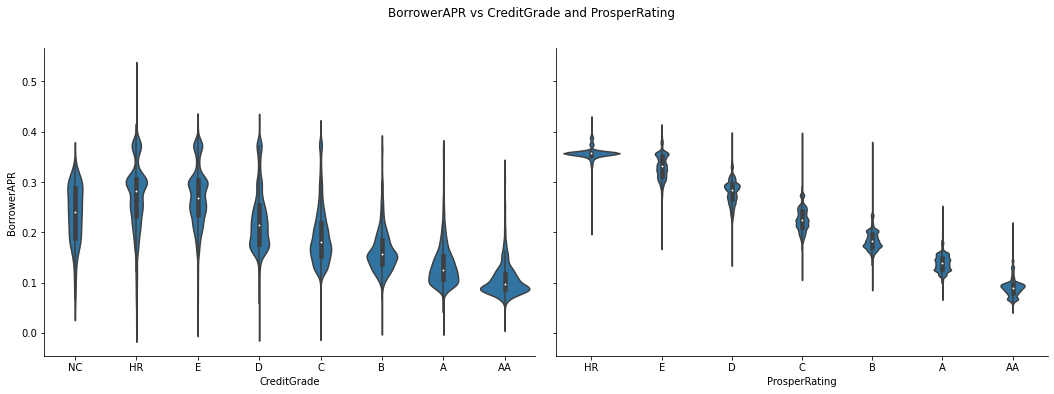

In [107]:
def violingrid(x, y, **kwargs):
    ''' Quick hack for creating violin plots with seaborn's PairGrid.'''
    
    default_color = sb.color_palette()[0]
    sb.violinplot(x = x, y = y, color = default_color)
    
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = listing, y_vars = 'BorrowerAPR', x_vars = category_1,
               height = 5, aspect = 1.5)
g.map(violingrid)
g.fig.suptitle ('BorrowerAPR vs CreditGrade and ProsperRating', y = 1.08)

#### Observation:

- The CreditGrade rating is the rating employed by prosperloans before 2009. Its a way to classify the loan listing by level of risk. It can be observed that the rating approach is not as linear as the more recent ProsperRating which was introduced post 2009.
- They both show that the more risky the loan the higher the borrowerAPR. HR being the most risky while AA being the least risky.

#### ProsperScore and Term

<Figure size 360x360 with 0 Axes>

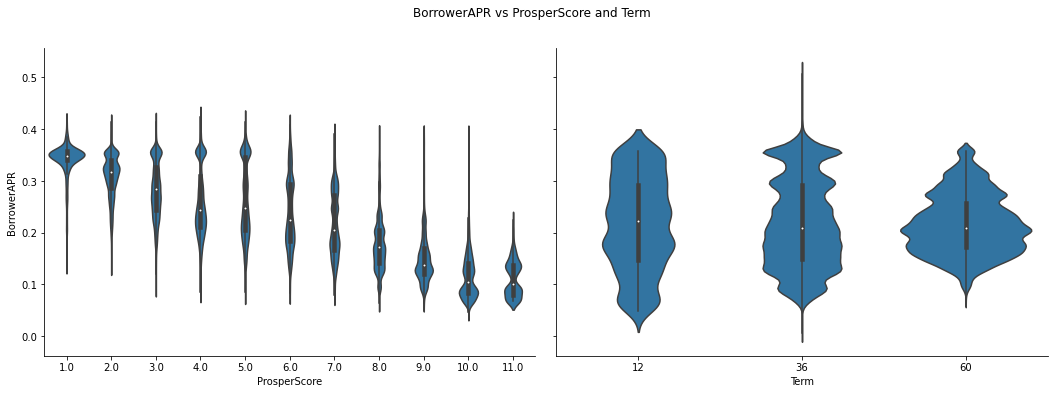

In [108]:
category_2 = ['ProsperScore', 'Term']
plt.figure(figsize = [5, 5])
g = sb.PairGrid(data = listing, y_vars = 'BorrowerAPR', x_vars = category_2,
               height = 5, aspect = 1.5)
g.map(violingrid)
g.fig.suptitle ('BorrowerAPR vs ProsperScore and Term', y = 1.08);

#### Observation
- ProsperScore is the customer's risk score based on their previous Loans on Prosper platform with 1 being highly risky and 10 being least risky according to the variable definition. There is another level of 11 in the ProsperScore column that doesn't fit in properly with the trend.
 - It can be observed that the BorrowerAPR reduces as the risk value for an individual reduces.
 
 - The borrowerAPR is not affected by the term of the loan. Although the 60 months term seem a little wider on the lower end suggesting that longer term loans get a little lower APR.

#### BorrowerAPR vs ListingCategory

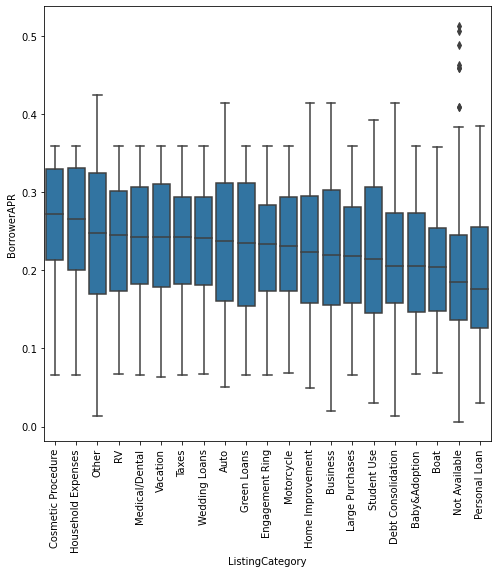

In [109]:
# Defining the order
listing_category_median = listing.groupby('ListingCategory')['BorrowerAPR'].median().sort_values(ascending = False).index

# Plotting the boxplot
plt.figure(figsize = [8, 8])
g = sb.boxplot(data = listing, y = 'BorrowerAPR', x = 'ListingCategory', color = default_color, order = listing_category_median)

plt.xticks(rotation = 90);

#### Observation
- It can be observed that Personal loan has lowest median APR while Cosmetic Procedure has the highest median APR

<a id = 'loan_cat'></a>
#### Loan Status and Categorical Variable

LoanStatus and 

In [110]:
categoric_vars

['CreditGrade',
 'Term',
 'LoanStatus',
 'ProsperRating',
 'ProsperScore',
 'ListingCategory']

In [111]:
def clustered_barchart(df, x ,hue, ncol = 1, rot = 90, scale = 'log',color = 'Blues'):
    ''' Plots a clustered bar chart using seaborn countplot and anotate it countplot  '''
    
    
    sb.countplot(data = df, x = x, hue = hue, palette = color)
    plt.legend(title = hue, bbox_to_anchor = (1.04,1), ncol =ncol)
    plt.yscale(scale)
    plt.tight_layout()
    plt.title('Count of {} for different levels of {}'.format(x,hue))
    plt.xticks(rotation = rot);


In [112]:
def FacetGrid_Plotter(df, target_feature, var, var2 = None, scale = 'log', col_wrap = 3,
                      height = 3,  aspect = 1.5, order = None, kind = sb.countplot):
    ''' plots a Countplot FacetGrid '''
    if var2 == None:
        g= sb.FacetGrid(data = df, col = target_feature, col_wrap=col_wrap, height = height, aspect = aspect, )
        g.map(kind, var, order = order)
        g.set(yscale = scale)
        g.fig.suptitle('{} vs {}'.format(target_feature, var), y = 1.04)
    
        return(g)
    else:
        g= sb.FacetGrid(data = df, col = target_feature, col_wrap=col_wrap, height = height, aspect = aspect, )
        g.map(kind, var,var2)
        g.set(yscale = scale)
        g.fig.suptitle('{} vs {}'.format(target_feature, var), y = 1.04)

#### LoanStatus vs ProsperRating

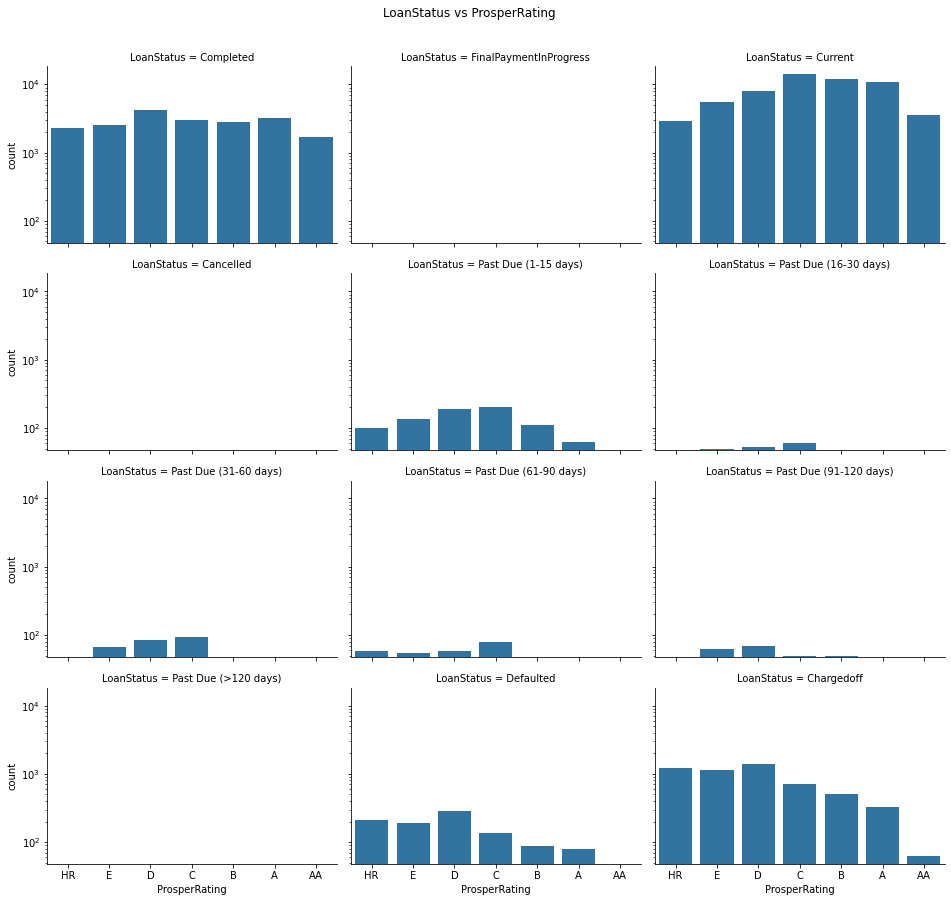

In [113]:
# Using the FacetGrid_Plotter Function
FacetGrid_Plotter(listing, 'LoanStatus', 'ProsperRating')

#### Observation
- The D level of the ProsperRating is always the most frequent across the different levels of LoanStatus. 
- The completed level of the LoanStatus shows a rather flat relationship with prosperRating.
- The Defaulted and Chargedoff level of the LoanStatus shows a negative relationship with improving prosperRating. This is more obvious from the D to AA rating.

#### LoanStatus vs CreditGrade

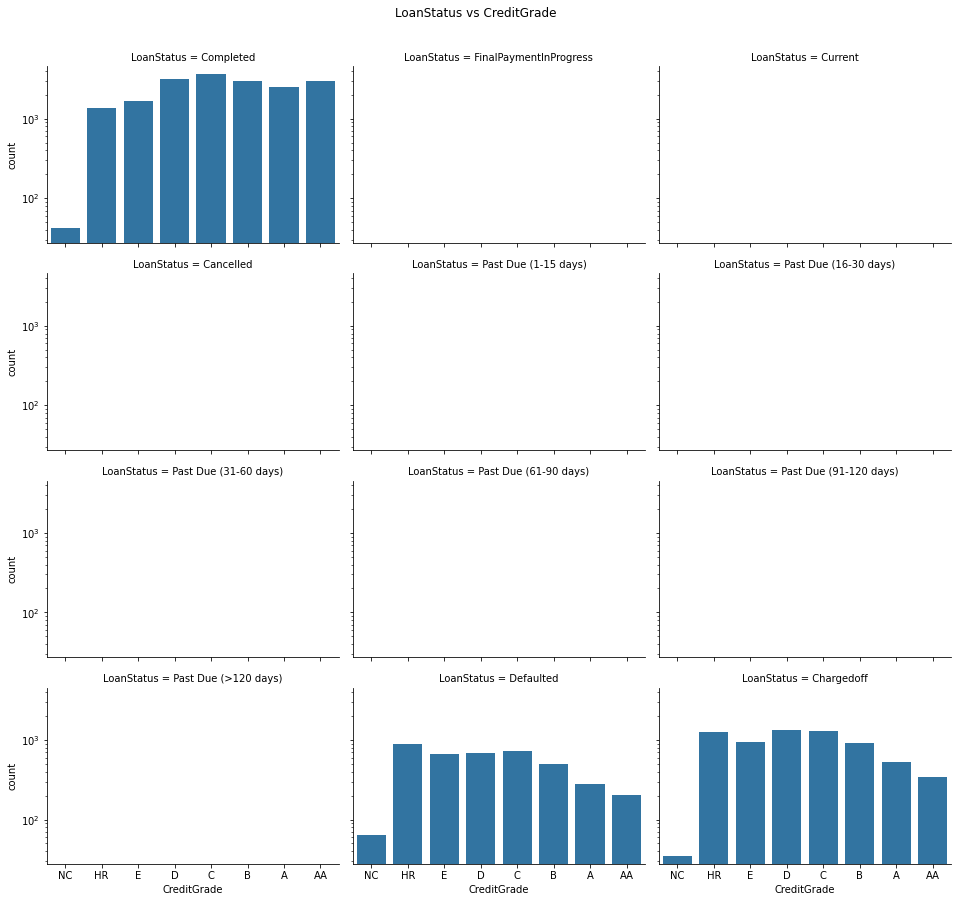

In [114]:
# Using the FacetGrid_Plotter Function
FacetGrid_Plotter(listing, 'LoanStatus', 'CreditGrade')

- CreditGrade was the prosper listing rating system Pre 2009. this plot reveals that there were less categorisation of the loanStatus as at then. Pre 2009,Its either the Loan was completed, Defaulted, or Chargedoff.

- A lot of HighRisk Loans got Chargedoff or defaulted

- The rate of Default is also higher as compared to what is obtained in the ProsperRating era(i.e post 2009)

- The **prosperRating** seem an overall better predictor of the **loanStatus** than **CreditGrade**, as it has lesser count for defaulted and chargedoff loans for higher level rating like **B**, **A** and **AA**.

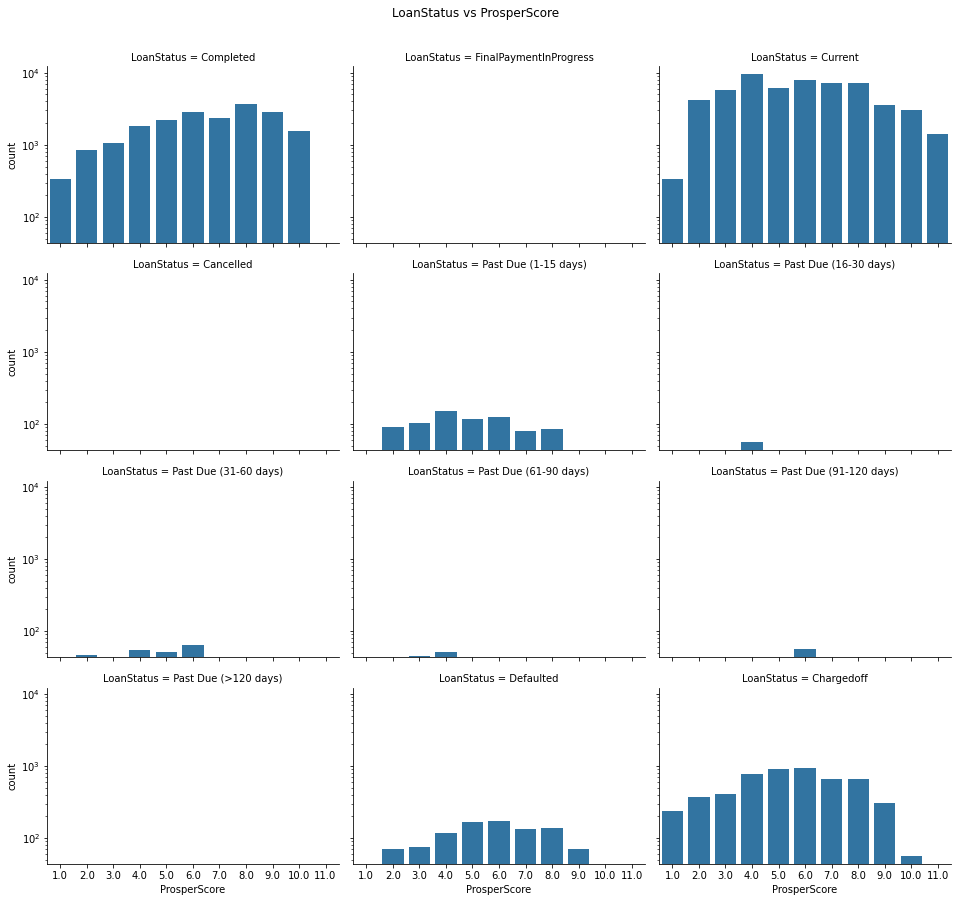

In [115]:
# Using the FacetGrid_Plotter Function

FacetGrid_Plotter(listing, 'LoanStatus', 'ProsperScore', col_wrap = 3)

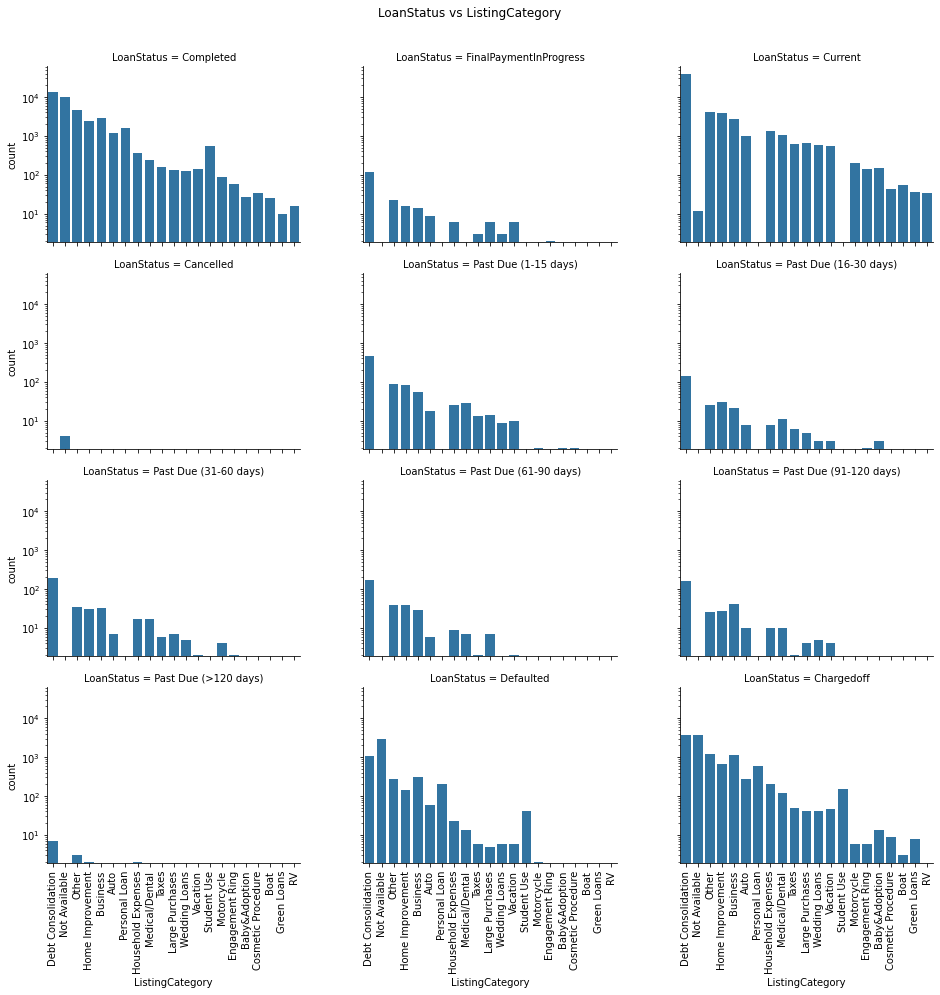

In [116]:
# Using the FacetGrid_Plotter Function
ax = FacetGrid_Plotter(listing, 'LoanStatus', 'ListingCategory', col_wrap = 3, order = listing['ListingCategory'].value_counts().index)
#ax.set_xticklabels(xticks = ax.get_xticklabels(), rotation = 90)
for axes in ax.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), 
                         rotation=90)
    

<a id = 'time_targ'></a>
### Time and Target Features

#### Count of Terms and LoanStatus

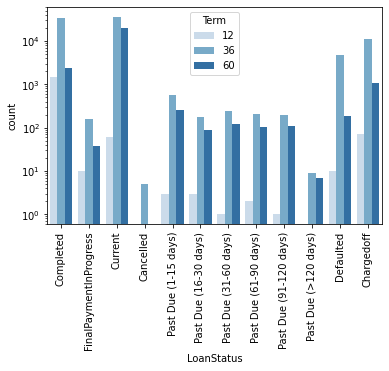

In [117]:
# Plot of count of terms and LoanStatus
g = sb.countplot(data = listing, x = 'LoanStatus', hue= 'Term', palette = 'Blues')
g.set(yscale = 'log');
g.set_xticklabels(g.get_xticklabels(), rotation = 90);


#### ListingCreationDate and LoneStatus

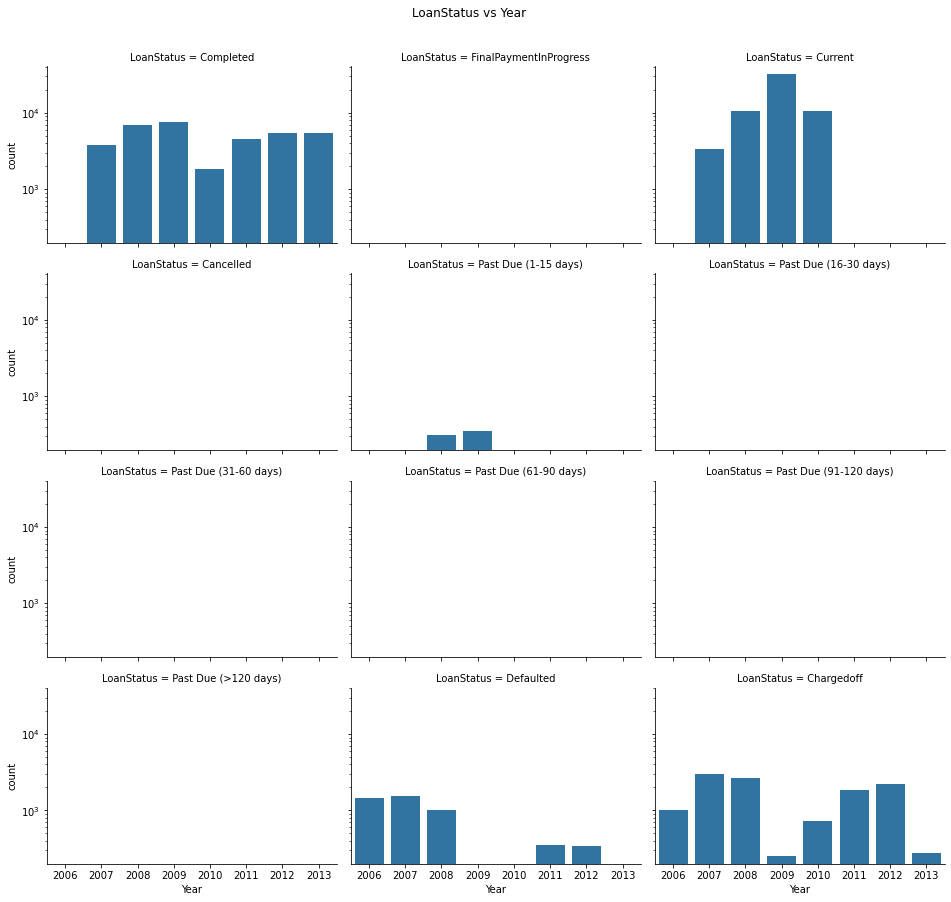

In [118]:
listing['Year'] = listing.ListingCreationDate.apply(lambda x: x.year)
ax = FacetGrid_Plotter(listing, 'LoanStatus', 'Year', col_wrap = 3)


#### BorrowerAPR vs ListingCategory(Year)

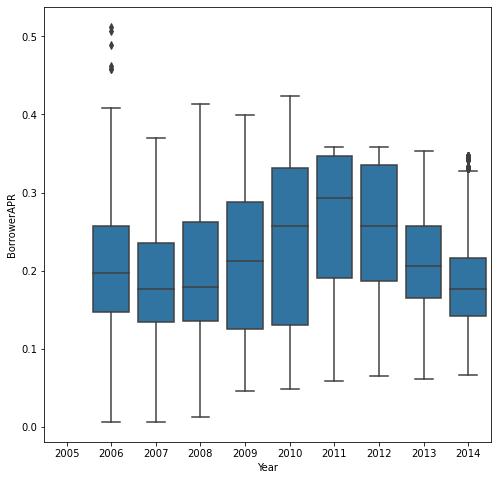

In [119]:
# Plotting the boxplot for
plt.figure(figsize = [8, 8])
g = sb.boxplot(data = listing, y = 'BorrowerAPR', x = 'Year', color = default_color)


<a id = 'borr_targ'></a>
#### borrowers_profile and Target Features.

In [120]:
# Merge selected column from the borrowers_profile DataFrame to listing DataFrame
borrowers_profile_select = ['ListingKey','BorrowerState', 'Occupation','EmploymentStatus', 'IsBorrowerHomeowner', 'CreditScoreRangeLower', 'DebtToIncomeRatio']
listing_borrower = listing.merge(borrowers_profile[borrowers_profile_select], on = 'ListingKey')

In [121]:
listing_borrower.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115654 entries, 0 to 115653
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ListingKey               115654 non-null  object        
 1   ListingNumber            115654 non-null  int64         
 2   ListingCreationDate      115654 non-null  datetime64[ns]
 3   CreditGrade              28820 non-null   category      
 4   Term                     115654 non-null  category      
 5   LoanStatus               115654 non-null  category      
 6   ClosedDate               54982 non-null   datetime64[ns]
 7   BorrowerAPR              115629 non-null  float64       
 8   BorrowerRate             115654 non-null  float64       
 9   LenderYield              115654 non-null  float64       
 10  EstimatedEffectiveYield  86703 non-null   float64       
 11  EstimatedLoss            86703 non-null   float64       
 12  EstimatedReturn 

In [122]:
# rename 'CreditScoreRangeLower' as CreditScore
listing_borrower.rename(columns = {'CreditScoreRangeLower' : 'CreditScore'}, inplace = True)

In [123]:
def quant_qualplotter(df, target_feature, variable, rotation =90, width = 10, height = 10, kind = sb.boxplot):
    
    '''Plots the bivariate plts of 1 quantitative and 1 qulitative variable ''' 
    
    # Plotting the boxplot
    plt.figure(figsize = [width, height])
    borrower_state_order = df.groupby(variable)[target_feature].median().sort_values(ascending = False).index
    g = kind(data = df, y = target_feature, x = variable, color = default_color, order = borrower_state_order)
    plt.xticks(rotation = rotation)
    plt.title('Plot of {} against {}'.format(target_feature, variable));

#### BorrowerAPR VS BorrowerState

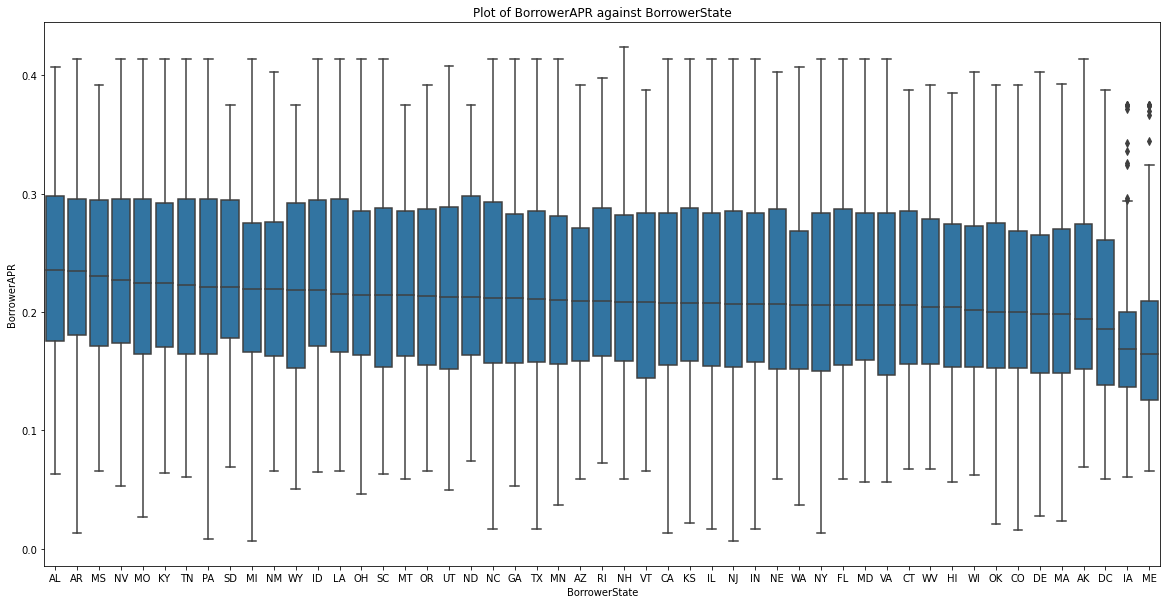

In [124]:
quant_qualplotter(listing_borrower, 'BorrowerAPR', 'BorrowerState', width =20, rotation = 0)

#### BorrowerAPR and Occupation

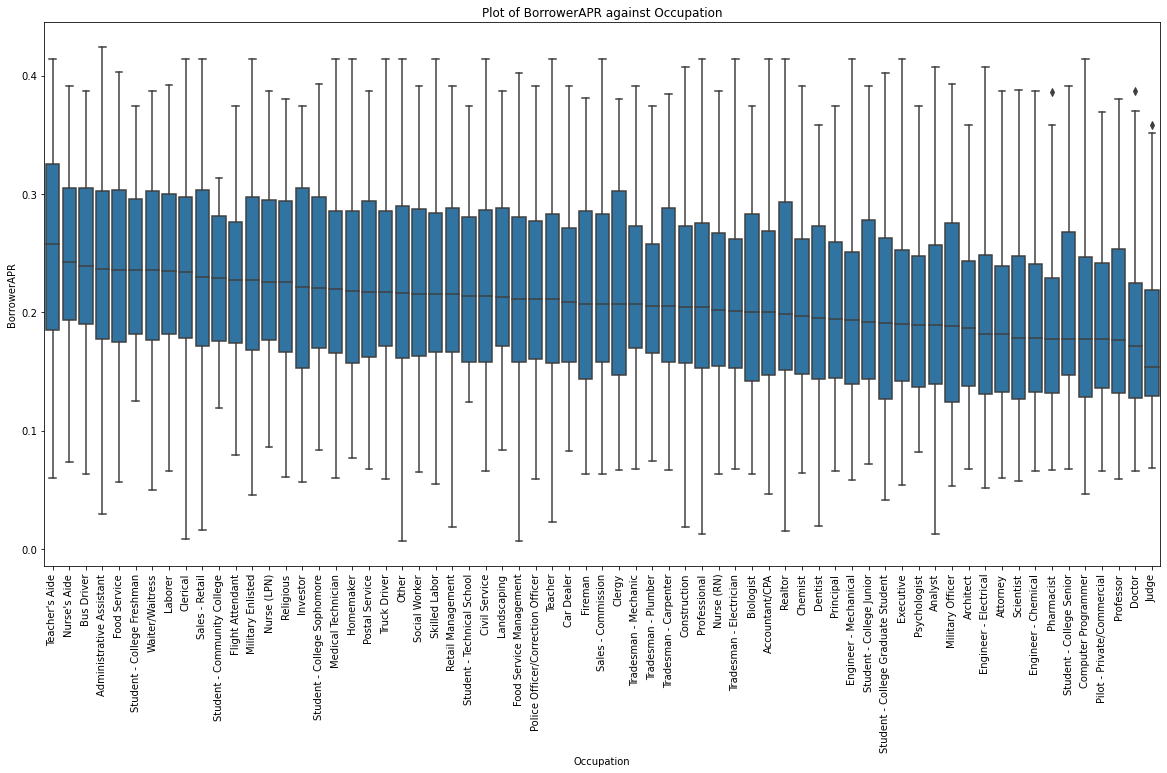

In [125]:
quant_qualplotter(listing_borrower, 'BorrowerAPR', 'Occupation', width =20)

#### Observation
- This is as expected, Those with lower or unskilled labour occupation types tends to pay a higher APR as compared to semi-skilled and skilled labor
- The higher the quality of your Skill the lesser you tend to pay in servicing your loan.

#### BorrowerAPR and IsBorrowerHomeowner

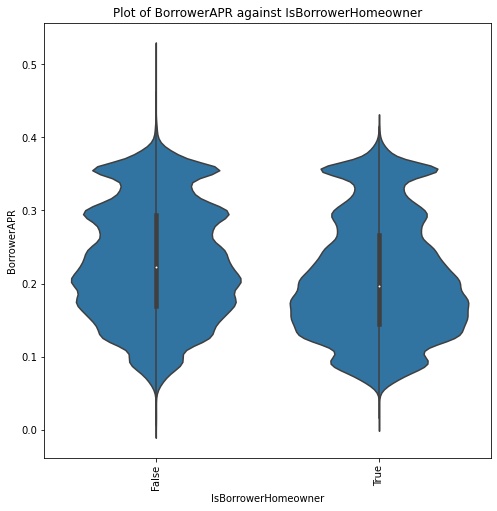

In [126]:
quant_qualplotter(listing_borrower, 'BorrowerAPR', 'IsBorrowerHomeowner', width =8, height =8, kind = sb.violinplot)

#### Observation
- This is as expected. A secured loan tend to be cheaper than an unsecured loan due to the reduced risk exposure.
- It can also be observed that the distribution is wider on the lower end of the violinplot.

#### BorrowerAPR and EmploymentStatus

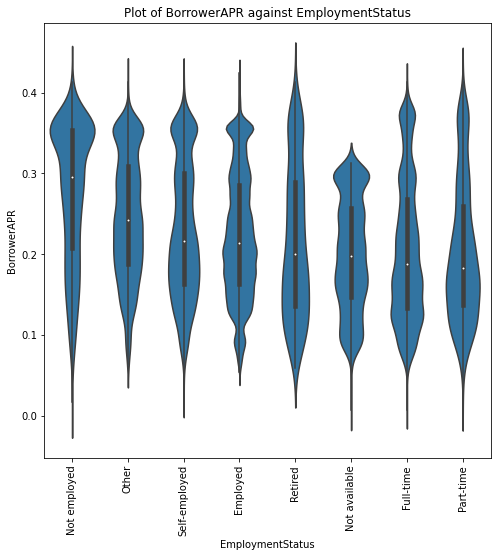

In [127]:
quant_qualplotter(listing_borrower, 'BorrowerAPR', 'EmploymentStatus', width =8, height =8, kind = sb.violinplot)

#### Observation

 - This plot shows that those who are unemployed tend to have higher APR 
 - Retired people tend to have moderately lower APR. I suspect that this is because they tend to have better CreditScore value since they are more experienced in Loan taking. 
 - we can also observe large wiskers showing that the borrower APR distribution for each level inthe EmploymentStatus cover large ranges. This will be due to several variables acting to decide what APR rate a Borrower will get.

#### BorrowerAPR and DebtToIncomeRatio

<AxesSubplot:xlabel='DebtToIncomeRatio', ylabel='BorrowerAPR'>

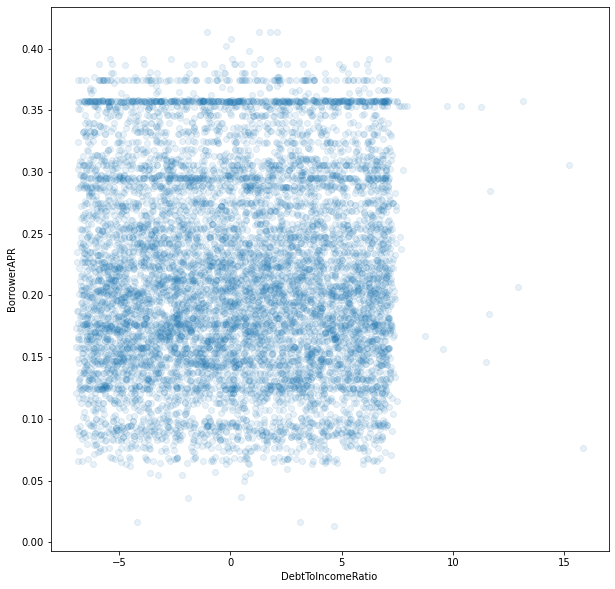

In [128]:
plt.figure(figsize = (10,10))
listing_borrower_sample = listing_borrower.sample(10000, replace = False)
sb.regplot(data = listing_borrower_sample, x = 'DebtToIncomeRatio', y = 'BorrowerAPR', x_jitter = 7, fit_reg = False, scatter_kws = {'alpha':0.1})

#### Observation
- No clear pattern can be observed

<a id = 'credit_feat'></a>
### CreditScore and other features

#### BorrowerAPR and CreditScore

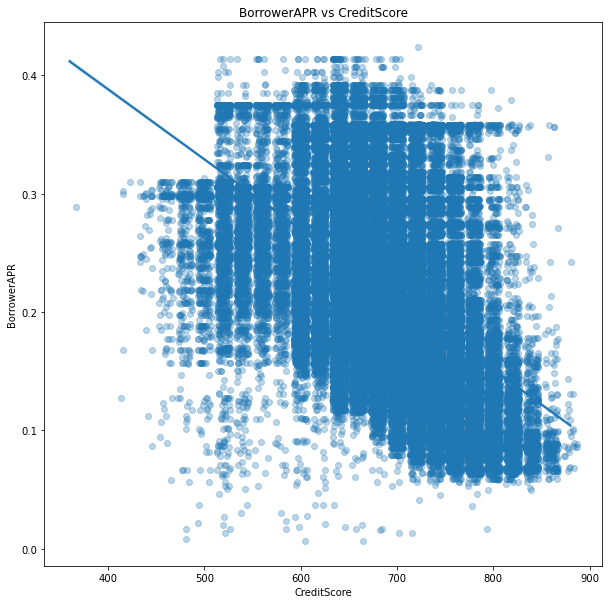

In [129]:
plt.figure(figsize = (10,10))
sb.regplot(data = listing_borrower, x = 'CreditScore', y = 'BorrowerAPR', 
           x_jitter = 7, scatter_kws = {'alpha':0.3});
plt.title('BorrowerAPR vs CreditScore');


#### Observation
- The trend is that the BorrowerAPR tend to reduce with incresing CreditScore value.This is as expected.

#### CreditScore vs EmploymentStatus

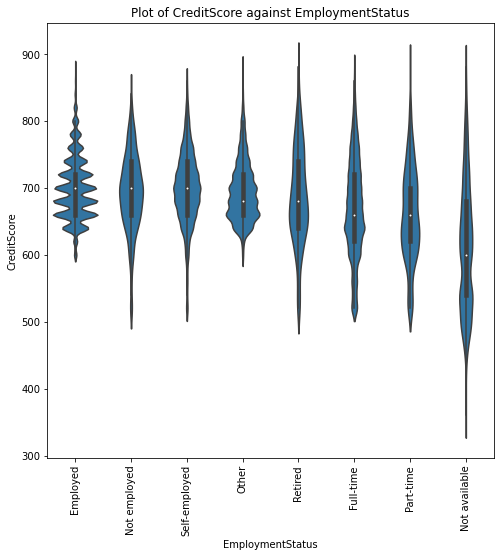

In [130]:
quant_qualplotter(listing_borrower, 'CreditScore', 'EmploymentStatus', width =8, height =8, kind = sb.violinplot)

#### Observation
- The median credit score typically ranges between 600 and 700 across the EmploymentStatus Level
-  

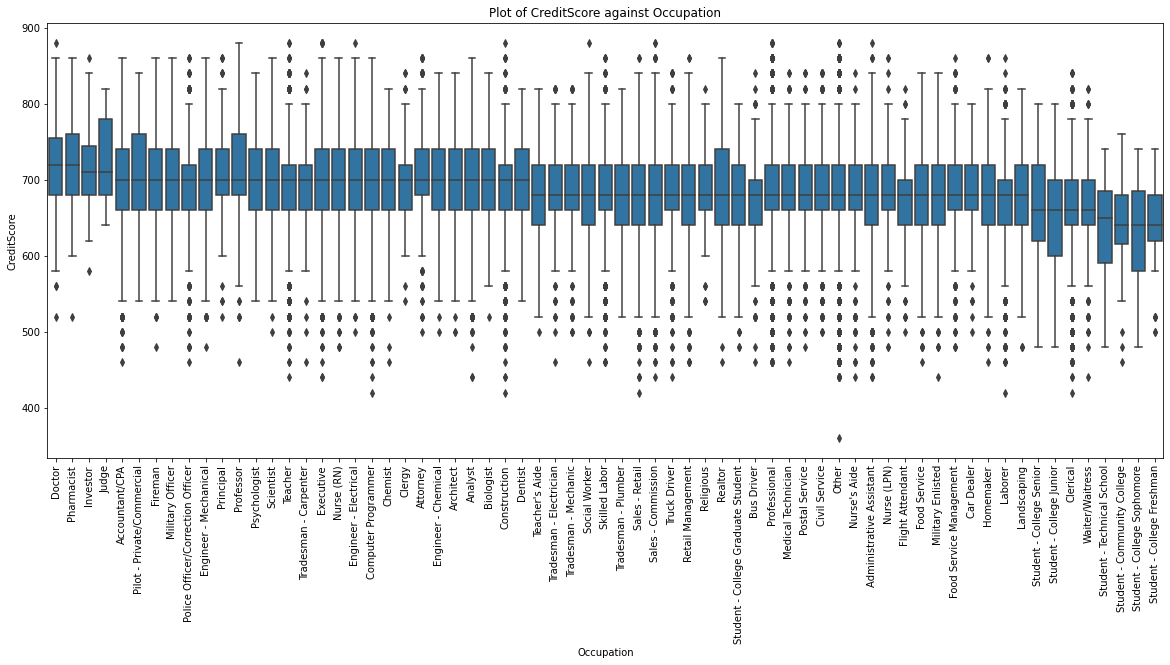

In [131]:
quant_qualplotter(listing_borrower, 'CreditScore', 'Occupation', width =20, height =8)

#### Observation
- The CreditScore shows a pattern where certain group of occupation have similar credit score median value.
        - Doctors and pharmacist
        - Investors and Judges
        - Accountant Through to dentist
        - Teachers aid to Landscaping
        - Senior college students to Waiter/Waitress
        - Technical school students to  College Freshman.
- The credit score median value shows a reducing trend in this order.

#### CreditScore vs IsBorrowerHomeowner

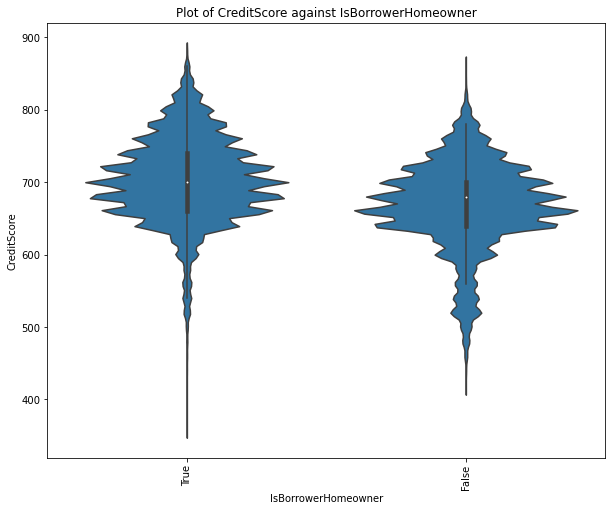

In [132]:
quant_qualplotter(listing_borrower, 'CreditScore', 'IsBorrowerHomeowner', width =10, height =8, kind = sb.violinplot)

#### Observation
- The CreditScore has the same distribution for the two levels of IsBorrowerHomeowner column
- The Creditscore value for those who are homeowners is generaly higher than for those who are not homeowner

<a id = 'bi_discuss'></a>
### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  Overall, most of the Relationships are as expected. The highlight of the Investigation so far, are as follows:

- As the BorrowerAPR (the feature of interest) increases, the Lender's Yield increases. i.e The more overall payment the borrower pays on the loan, the more interest the lender makes on his money.

- As the BorrowerAPR increases, the EstimatedLoss also increases. i.e The higher the APR, the higher the amount of the lender's money at risk of being lost in the event of charge-offs.

- With improving CreditGrade, ProsperRating and ProsperScore ratings, the BorrowerAPR reduces. This means that the BorrowerAPR is associated with higher risk.

- Also, The LoanStatus (another feature of interest), shows that there are more occurences of default and chargeoffs amongst loans of lower or undesirable risk rating.

- Finally, The relationship between several borrowers_profile variables were observed with respect to BorrowerAPR. 

- Credit score is a major borrower profile for consideration for loans. It can be observed that with increased credit score   There is a reduction in BorrowerAPR.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> A little more focus on the Creditscore and other borrowers_profile variables reveals the following information:
- CreditScore shows a  clear relationship with employment status.
        - The credit score median value is rather the same for employed, unemployed and self employed. Although, the outliers are all towards higher creditscore value for employed While for unemployed and self employed, they are more distributed around the median value
        - The creditscore also shows a strong relationship with occupation as it groups them into different category,mostly based on skill level. 
<li><a href='#Bivariate'> Return </a></li>

<a id = 'Multivariate'></a>
## Multivariate Exploration

Here, I will be exploring the data set further, with the aim to see how various borrowers profile variable interact to affect BorrowerAPR. The major question on my mind is, What are the combination of `borrowers_profile` status that indicates **lower risk** and **higher BorrowerAPR** ?

**major headings**
<ul>
<li><a href = '#Employment_credit'> BorrowerAPR, CreditScore and EmploymentStatus </a></li>
<li><a href = '#Employment_credit_ISBH'> BorrowerAPR, CreditScore, EmploymentStatus and IsBorrowerHomeowner status </a></li>
<li><a href = '#Occupation_credit'> BorrowerAPR, CreditScore and Occupation </a></li>
<li><a href = '#Occupation_credit_ISBH'> BorrowerAPR, CreditScore, Occupation and IsBorrowerHomeowner </a></li>
<li><a href = '#Occupation_credit_ISBH_Employment'> BorrowerAPR, CreditScore, Occupation,  IsBorrowerHomeowner and Employmentstatus </a></li>
<li><a href = '#Discussion'> Discussion </a>
<ul>
    
 
<li><a href='#intro'> Home</a></li>

<a id = 'Employment_credit'></a>
#### BorrowerAPR, CreditScore and EmploymentStatus

In [133]:
# Filtering out non descriptive values from the EmploymentStatus i.e. Other and Not available
listing_borrower_filtered = listing_borrower[~(listing_borrower['EmploymentStatus'].isin(['Not available', 'Other']))]

In [134]:
listing_borrower[['EmploymentStatus', 'Occupation']][listing_borrower['EmploymentStatus'].isin(['Not available', 'Other'])].value_counts()

EmploymentStatus  Occupation              
Other             Other                       2479
Not available     Other                       1503
                  Professional                 589
                  Clerical                     293
                  Computer Programmer          258
                                              ... 
                  Biologist                      3
Other             Computer Programmer            2
                  Accountant/CPA                 1
                  Administrative Assistant       1
                  Judge                          1
Length: 69, dtype: int64

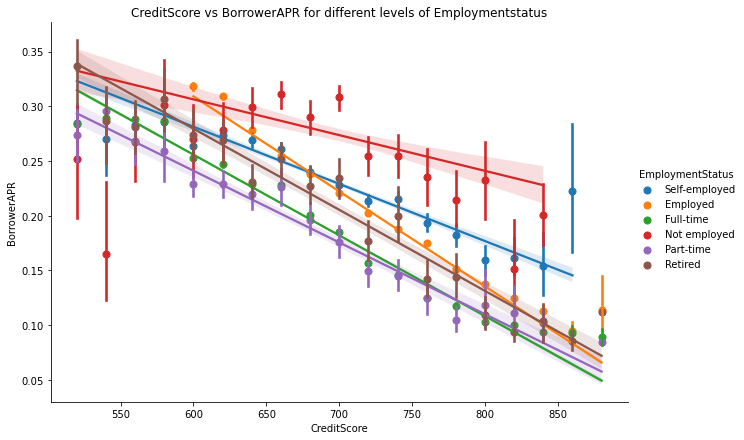

In [135]:
# The multivariate plot of BorrowerAPR, CreditScore and EmploymentStatus
ax = sb.lmplot(data= listing_borrower_filtered, x ='CreditScore', y = 'BorrowerAPR', hue ='EmploymentStatus',
               x_estimator = np.mean, height = 6, aspect = 1.5)
plt.title('CreditScore vs BorrowerAPR for different levels of Employmentstatus');

#### Observations
- Overall, **Not employed** showed the highest BorrowerAPR across the entire CreditScore values. It is obvious that the outliers at lower CreditScore values had the effect of pulling the regression line downwards else, the borrowerAPR would have been much higher at lower CreditScore ranges. 

- Employed, Not employed and retired at lower credit score ranges (< 600) have the highest BorrowerAPR. this is indicative of higher risk although it also means higher potential yield.

- At the intermediate CreditScore values (600< CreditScore > 750), Employed and Self-employed have the highest BorrowerAPR.This is without respect to the Not employed category that has the highest BorrowerAPR across board.

- At the highest CreditScore values (> 750), the self employed and the retired has the highest BorrowerAPR. Again, the Not employed category is not being considered.

<a id = 'Employment_credit_ISBH'></a>
#### BorrowerAPR, CreditScore and EmploymentStatus further categorized by their IsBorrowerHomeowner status

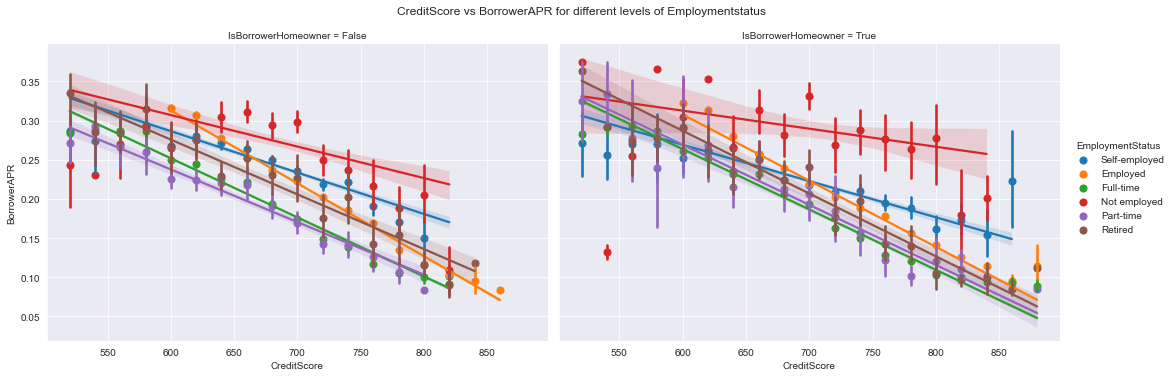

In [136]:
# The multivariate plot of BorrowerAPR, CreditScore and EmploymentStatus 
#further categorized by IsBorrowerHomeowner
sb.set_style('darkgrid')
ax = sb.lmplot(data= listing_borrower_filtered, x ='CreditScore', y = 'BorrowerAPR', 
               hue ='EmploymentStatus',col = 'IsBorrowerHomeowner',
               x_estimator = np.mean, height = 5, aspect = 1.5)
ax.fig.suptitle('CreditScore vs BorrowerAPR for different levels of Employmentstatus', y = 1.04);

#### Observation
- Generally, at lower creditscore (< 500) homeowners tend to have higher BorrowerAPR as compared to those with similar creditscore who are not homeowners. This might be because of the way prosper loan defines homeowner. You are a homeowner if you have a mortgage on your credit profile or provide a documentation that proves you own a house. However a mortgage can greatly increase your debt burden.


- Amongst the homeowner category, there is less intersection across the range of creditscore. especially amongst the Employed, Retired, Part-time and Full-time group.

- For borrowers who are homeowners, Employed have the highest BorrowerAPR across the range of creditscore value followed by Retired, then Part-Time and then Full-time.  

- The **Not employed** shows the greatest variablity. This is more pronounced at lower CreditScore values especially, when they have a home.

- The Self employed with a home have the lowest BorrowerAPR value at lower creditscore ranges in comparison with other category with home. At the higher end of the Creditscore range their APR value moves upward slightly, making their regression line flatter overall.

- The employed have a lower cap for their creditscore value at 600. This is way better than other categories that extend well below 500.

- overall, the group of borrowers who are homeowners have a wider range of credit score, extending well into the 900 range.

<a id = 'Occupation_credit'></a>
#### BorrowerAPR, CreditScore and Occupation.

- It will be too cumbersome to look at the occupation directly due to the large amount of occupation listed in the occupation column.

- However, in the bivariate section of these analysis, I have already proven that certain groups of occupation have similar Creditscore value. I will take advantage of this information to further categorise the occupation variable.

- A close look at the clusteres formed already inform that the credit score is with respect to their skill levels.Therefore, I have categorised them into 5 groups namely, **Highly Skilled**, **Skilled**, **Semiskilled**, **Unskilled** and **Students**

#### Code

In [137]:
# Creating lists of each group of occupation
occupation_skill_median = listing_borrower.groupby('Occupation')['CreditScore'].median().sort_values(ascending = False)

Highly_Skilled_A = ['Doctor', 'Pharmacist']
Highly_Skilled_B = ['Investor','Judge']
Skilled = occupation_skill_median['Accountant/CPA':'Dentist'].index.tolist()
Semi_skilled =  occupation_skill_median["Teacher's Aide":'Landscaping'].index.tolist()
Unskilled = occupation_skill_median["Student - College Senior":'Waiter/Waitress'].index.tolist()
Students = occupation_skill_median["Student - Technical School":'Student - College Freshman'].index.tolist()

In [138]:
# Creating a new column and filling with appropriate values by occupation status.
listing_borrower_filtered.loc[listing_borrower_filtered['Occupation'].isin(Highly_Skilled_A), 'Occupation_status'] ='Highly_Skilled_A'
listing_borrower_filtered.loc[listing_borrower_filtered['Occupation'].isin(Highly_Skilled_B), 'Occupation_status'] ='Highly_Skilled_B'
listing_borrower_filtered.loc[listing_borrower_filtered['Occupation'].isin(Skilled), 'Occupation_status'] ='Skilled'
listing_borrower_filtered.loc[listing_borrower_filtered['Occupation'].isin(Semi_skilled), 'Occupation_status'] ='Semi_skilled'
listing_borrower_filtered.loc[listing_borrower_filtered['Occupation'].isin(Unskilled), 'Occupation_status'] ='Unskilled'
listing_borrower_filtered.loc[listing_borrower_filtered['Occupation'].isin(Students), 'Occupation_status'] ='Students'

In [139]:
# convert to categorical variable
OccupationStatus_list = ['Highly_Skilled_A', 'Highly_Skilled_B', 'Skilled', 'Semi_skilled', 'Unskilled', 'Students']
listing_borrower_filtered['Occupation_status'] = ordered_class(OccupationStatus_list, listing_borrower_filtered,'Occupation_status', True)

In [140]:
Semi_skilled

["Teacher's Aide",
 'Tradesman - Electrician',
 'Tradesman - Mechanic',
 'Social Worker',
 'Skilled Labor',
 'Tradesman - Plumber',
 'Sales - Retail',
 'Sales - Commission',
 'Truck Driver',
 'Retail Management',
 'Religious',
 'Realtor',
 'Student - College Graduate Student',
 'Bus Driver',
 'Professional',
 'Medical Technician',
 'Postal Service',
 'Civil Service',
 'Other',
 "Nurse's Aide",
 'Administrative Assistant',
 'Nurse (LPN)',
 'Flight Attendant',
 'Food Service',
 'Military Enlisted',
 'Food Service Management',
 'Car Dealer',
 'Homemaker',
 'Laborer',
 'Landscaping']

#### Test

In [141]:
# Check to see that all observations has been captured
listing_borrower_filtered['Occupation_status'].isnull().sum()

2224

In [142]:
# confirmed that all available observations has been captured
listing_borrower_filtered['Occupation'].isnull().sum()

2224

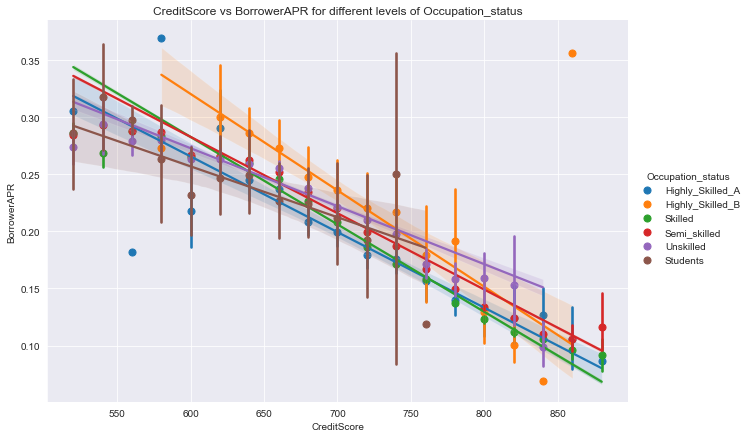

In [143]:
#Multivariate plot of BorrowerAPR, CreditScore and Occupation
ax = sb.lmplot(data= listing_borrower_filtered, x ='CreditScore', y = 'BorrowerAPR', hue ='Occupation_status',
               x_estimator = np.mean, height = 6, aspect = 1.5)
plt.title('CreditScore vs BorrowerAPR for different levels of Occupation_status');

#### Observation
1. At lower CreditScore values(< 500), skilled and semiskilled tend to have very high BorrowerAPR values. meaning that they are very risky.

2. At lower CreditScore values(< 500), Unskilled and students tend to have lower APR, however,the confidence interval is wider, indicating a lot of variability and uncertainty.

3. At intermediate CreditScore values(600>CreditScore<720), there is a strong intersection amongst all the group. suggesting that they are all within range for relatively similar BorrowerAPR values. Although, the Highly_Skilled_B group tend to have a higher BorrowerAPR of all the groups. This is clearly due to the outlier point at the top right corner of the plot page.

4. At higher CreditScore value (> 700), Unskilled and Semi_skilled tend to have higher BorrowerAPR values, Highly_Skilled_B now have lower APR than the two previous groups while, Skilled and Highly_Skilled_A now have the lowest APR of the two groups.

5. The intermediate CreditScore region will make for the best APR mix with moderate risk.
 

<a id = 'Occupation_credit_ISBH'></a>
#### BorrowerAPR, CreditScore, Occupation and IsBorrowerHomeowner

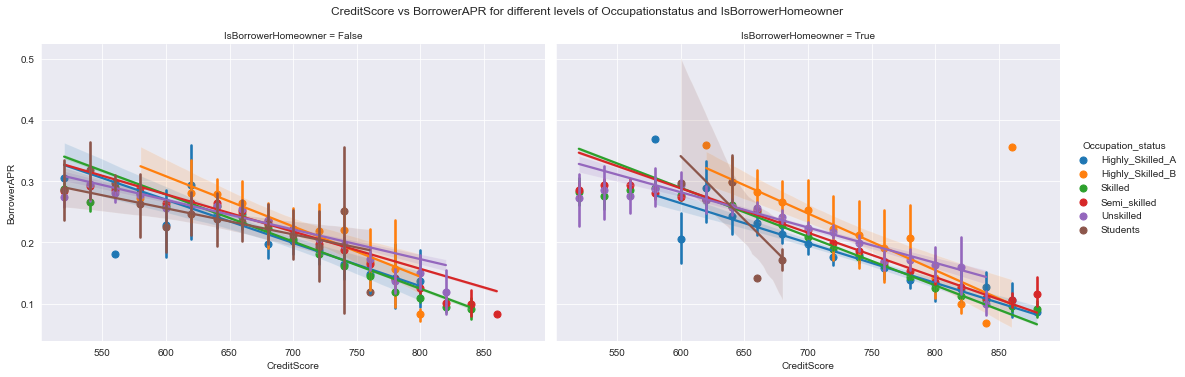

In [144]:
#Multivariate plot of BorrowerAPR, CreditScore and Occupation 
# Further Categorised by IsBorrowerHomeowner
ax = sb.lmplot(data= listing_borrower_filtered, x ='CreditScore', y = 'BorrowerAPR', 
               hue ='Occupation_status',col = 'IsBorrowerHomeowner',
               x_estimator = np.mean, height = 5, aspect = 1.5, hue_order = OccupationStatus_list)
ax.fig.suptitle('CreditScore vs BorrowerAPR for different levels of Occupationstatus and IsBorrowerHomeowner', y = 1.04);

#### Observation
1. At lower CreditScore ranges (<650), the HighlySkilled_B group have the highest BorrowerAPR. This is even more pronounced especially for those who own homes. It seem like there might be an explanation apart from the outlier.
        - One explanation could be that they are supposed to have a higher CreditScore value, and a low CreditScore is indicative of some other underlining personal finance issues.

2. At lower CreditScore ranges (<650), Students who are homeowners,have very wide confidence interval indicative of uncertainty.

3. At lower CreditScore ranges (<650), Students and Unskilled who are not homeoweners have lower BorrowerAPR. This is consistent with logic given above.
        - having a lower CreditScore is expected for this group so a lower creditscore is not indicative of risk hence, a lower APR. However, if they are homeowners (Particularly, the Students), The confidence interval widens significantly. Indicating a lot of uncartainty.

4. At intermediate CreditScore value (650 > CreditScore < 750) there is a convergence indicating that here you have a good mix of high BorrowerAPR with moderate risk for all groups.

5. At higher CreditScore Value (> 750) unskilled and Semi_skilled have the highest BorrowerAPR. However, if Semi_skilled have a home, the BorrowerAPR goes down significantly.


<a id = 'Occupation_credit_ISBH_Employment'></a>
#### BorrowerAPR, CreditScore, Occupation,  IsBorrowerHomeowner and Employmentstatus.
- Here I will be filtering out employment status for '**Employed**' and '**Not employed**' to focus only on those who are employed and stated more specific employment status.i.e, **Self-employed**, **Full-time**, **Part-time** and **Retired**.

- I will also filter out students from the OccupationStatus because they will not fit into most of the EmploymentStatus category.

In [145]:
# filtering out Employed and Not-employed from the EmploymentStatus
listing_borrower_subset = listing_borrower_filtered[~(listing_borrower_filtered.EmploymentStatus.isin(['Employed', 'Not employed']))]

# Filtering out student from the Occupation_Status
listing_borrower_subset = listing_borrower_subset[~(listing_borrower_subset.Occupation_status == 'Students')] 

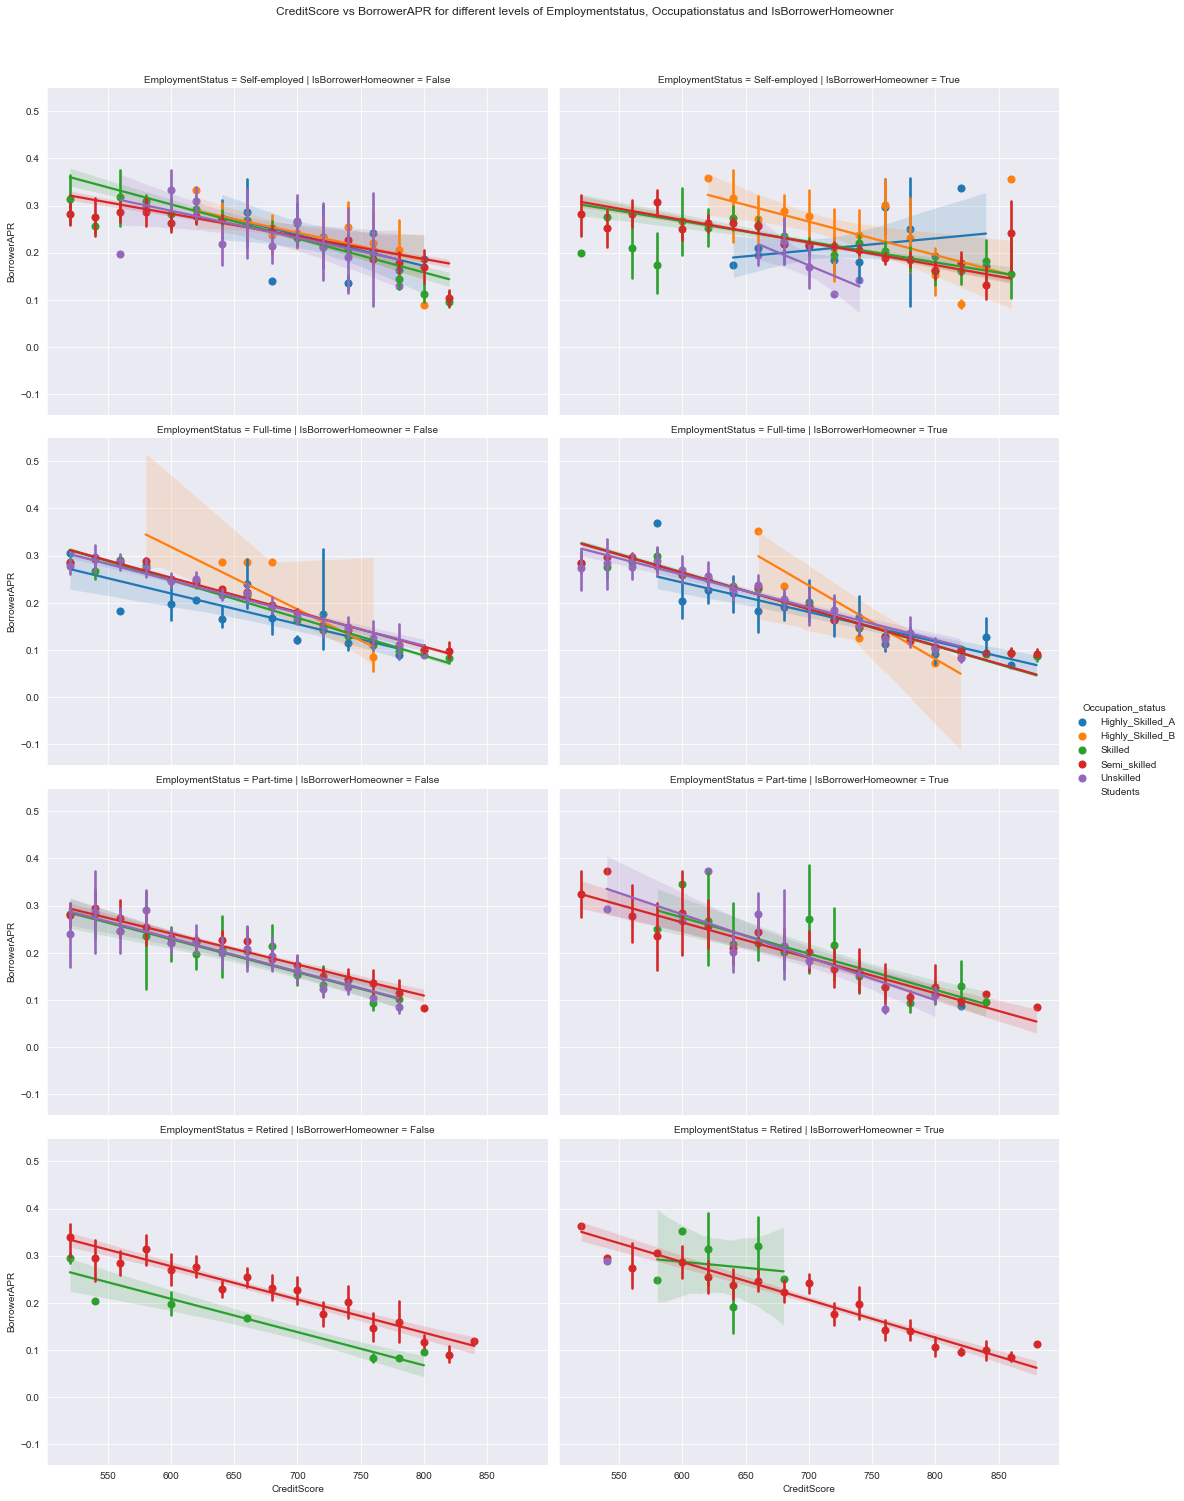

In [146]:
#Multivariate plot of BorrowerAPR, CreditScore and Occupation 
# Further Categorised by IsBorrowerHomeowner col
# even Further categorised by employmentstatus row
ax = sb.lmplot(data= listing_borrower_subset, x ='CreditScore', y = 'BorrowerAPR', 
               hue ='Occupation_status',col = 'IsBorrowerHomeowner', row = 'EmploymentStatus',
               x_estimator = np.mean, height = 5, aspect = 1.5, hue_order = OccupationStatus_list)
ax.fig.suptitle('CreditScore vs BorrowerAPR for different levels of Employmentstatus, Occupationstatus and IsBorrowerHomeowner ', y = 1.04);

#### Observation
- One striking note is that Those in High_Skilled_A group i.e Doctors and Pharmacist, and those in High_Skilled_B group i.e Investors and Judges, only work Fulltime or are Self-employed. 

- The relationship between Skilled, Semi_skilled and Unskilled labor group can also be observed across the EmploymentStatus axis.

    - It can be observed that Skilled people tend to have lower borrowerAPR as compared to Semi_skilled and Unskilled especially at higher Creditscore ranges across the different levels of EmploymentStatus. The difference becomes more pronounced for the retired group.
    
    - When the extra condition of being homeowners are added (The axis on the right),  the diferences between the Skilled and Semi_skilled group seems to close out. with the Semi_skilled sometimes having lower Borrower APR at higher creditScore ranges.
    
- There are several plots  with wide confidence intervals, especially for High_Skilled_A and High_Skilled_B most likely due to not enough datapoint or no clear pattern formation to confidently produce a regression line.

<a id = 'Discussion'></a>
### Discussion

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> In the previous Section (Bivariate Analysis section), I have clearly established the relationship between BorrowerAPR, LenderYield and Risk. I have also established the relationship between BorrowerAPR and CreditScore. 

This section follows from these established relationships to understand the variablity of several borrower_profile variables like EmploymentStatus, Homeownership status (IsBorrowerHomeowner) and Occupation_status in a bid to find an ideal borrowers_profile with high BorrowerAPR and moderate risk.

- The observations can be generally divided into three regions based on CreditScore value. 
     - The lower CreditScore region (averagely CreditScore < 600): Associated with higher BorrowerAPR values and higher risk. At this region most levels in the EmploymentStatus and OccupationStatus features are well differentiated into their particular BorrowerAPR score.
     
         * When the homeownership criteria is introduced the differentiation generally reduces sometimes significantly.
     
     + The intermediate region (ranging between 600 and 750): This region is associated with a convergence of most of the levels in the EmploymentStatus and Occupation_status. This region is also associated with moderately high BorrowerAPR and relatively lowerRisk.
     
     - The higher CreditScore region (> 750): This region is associated with differentiated BorrowerAPR value for different levels of the EmploymentStatus and OccupationStatus. The region is always associated with lower BorrowerAPR and low risk.
          - When the homeownership status is added the creditscore range for the different levels of EmploymentStatus and OccupatonStatus increases significantly towards the right. 

### Were there any interesting or surprising interactions between features?

> The High_Skilled_A group containing Doctor and Pharmacist shows increased BorrowerAPR with increasing CreditScore value when Self_employed. This is is the only group showing such trend and its worthy of further investigation.
<li><a href='#Multivariate'> Return </a></li>

<a id = 'Conclusion'></a>
## Conclusions
> In this Analysis, I have disected this very large dataset of Prosperloan data containing three differnt observational units into three dataframes and named them as follows to reflect their observation
        - listing: a concise summary of the loan request
        - borrower_profile: A profile of the borrower
        - loan: The credit history of the borrow with the Prosper platform and information about the current loan.


> I carried out three levels of analysis on the datasets to reveal more and more details in my quest to answer the question, ''What is the combination of borrower's profile that will yield the most interest for an investor with minimal risk?'.

**Univariate analysis**: reveals the distribution of various variables in the dataset.
**Bivariate analysis**: reveals the relationship that exist between several variables in the dataset. At this level of the analysis, I was able to make the following deductions.
    
         - As the BorrowerAPR increases, the Lender's Yield increases.
         - As the BorrowerAPR increases, the EstimatedLoss also increases
         - With improving CreditGrade, ProsperRating and ProsperScore ratings, the BorrowerAPR reduces
         - The LoanStatus, shows that there are more occurences of default and chargeoffs amongst loans of lower or undesirable risk rating.        
         - It can be observed that with increased credit score, there is a reduction in BorrowerAPR.

In summary, I reached the conclusion that with increased BorrowerAPR comes increased Yield for the lender which comes at greater risk as well. and also that creditscore of the borrower is a base criteria for determining the level of risk exposure a lender will have in entering into a deal with any borrower.

**Multivariate analysis**: On the basis of these conclusion I have explored more specific attributes of a lender like EmploymentStatus, OccupationStatus and homeownership status with respect to his CreditScore and BorrowerAPR. The following conclusion were reached at the end of the multivariate analysis.

            - CreditScore ranges can be divided into three different regions showing consistent pattern across the different levels of OccupationStatus and EmploymentStatus.
        
            - The lower CreditScore region (averagely CreditScore < 600): Associated with higher risk and higher BorrowerAPR. Here the OCcupationStatus and EmploymentStatus show differetiated borrowerAPR
        
            - The intermediate CreditScore region (ranging between 600 and 750): Associated with moderate Risk and Yield. The different levels of OccupationStatus and EmploymentStatus tend to converge at this region.
            
            - The higher CreditScore region (> 750): Associated with Lower BorrowerAPR, lower LenderYield and lower risk. Here also, the different levels of Employment status and OccupationStatus are differentiated by BorrowerAPR.
            
            - The homeownership status has the tendencies to reduce the differentiation between differnt level's BorrowerAPR while also extending the range of the CreditScore for each level more to the right.
            
**Key Take Away**: Different Investors have different strategies on the level of risk exposure they are willing to take. This analysis has explored and distilled a systematic approach to profiling a borrower even before delving into further details by first knowing the credit score, then the borrower's EmploymentStatus, Occupation_tatus and home ownership status. This will allow the investor filter through several listing before making further research into the once that passes the profiling test.
            
<li><a href='#intro'> Home</a></li>


> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

